

lread (Reads):
This metric measures the number of data transfers per second between the system memory (where the operating system and kernel reside) and the user memory (where applications and user-level processes run).
It reflects how often data is read from memory to fulfill requests from applications.

lwrite (Writes):
Similar to lread, this metric counts the number of data transfers per second between system memory and user memory, but in the opposite direction (writing data).
It indicates how frequently data is written back to memory after processing by applications.

scall (System Calls):
A system call is a request made by an application to the operating system for a specific service (e.g., file I/O, process management, network communication).
scall measures the total number of system calls per second across all types.
High values may indicate active application interactions with the OS.

sread (System Read Calls):
This metric specifically tracks the number of read system calls per second.
Read calls involve retrieving data from storage devices (e.g., reading files, network data).

swrite (System Write Calls):
Similar to sread, swrite focuses on the number of write system calls per second.
Write calls involve storing data to storage devices (e.g., saving files, sending data over the network).

fork (System Fork Calls):
A fork call creates a new process (a copy of the existing process) in the operating system.
fork measures the number of process creation requests per second.
Frequent forks may impact system resources.

exec (System Exec Calls):
An exec call replaces the current process image with a new program.
exec counts the number of program execution requests per second.
It’s relevant when applications launch other programs.

rchar (Read Characters) and wchar (Write Characters):
These metrics track the number of characters transferred per second during read and write operations.
Useful for understanding data flow between applications and storage.

pgout (Page Out Requests) and ppgout (Paged Pages Out):
These metrics relate to paging, where data is moved between RAM and disk.
pgout measures the number of page out requests per second (moving data from RAM to disk).
ppgout counts the number of pages paged out per second.

pgfree (Free Pages) and pgscan (Scanned Pages):
pgfree represents the number of pages per second placed on the free list (available for reuse).
pgscan checks if pages can be freed (scans for unused pages).

atch (Page Attaches):
Measures the number of page attaches per second (reclaiming a page in memory to satisfy a page fault).
Relevant for memory management.

pgin (Page-In Requests) and ppgin (Paged Pages In):
pgin tracks the number of page-in requests per second (moving data from disk to RAM).
ppgin counts the number of pages paged in per second.

pflt (Protection Fault Page Faults) and vflt (Virtual Memory Page Faults):
pflt represents page faults caused by protection errors (e.g., copy-on-write).
vflt indicates page faults due to address translation.

runqsz (Process Run Queue Size):
Reflects the number of kernel threads waiting for a CPU to run.
High values may indicate CPU-bound conditions.

freemem (Free Memory) and freeswap (Free Swap):
freemem shows the number of memory pages available to user processes.
freeswap counts the number of disk blocks available for page swapping.

usr (User Mode Percentage):
Represents the portion of time (%) that CPUs run in user mode (executing user-level application code).
High user mode time indicates active application processing.
Remember, these metrics help system administrators and developers optimize performance and diagnose issues. Lower MTTR and efficient resource utilization are desirable goals.

In [659]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

In [660]:
df=pd.read_excel('compactiv.xlsx')

In [661]:
df.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [662]:
df.shape

(8192, 22)

In [663]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [664]:
df.describe().T

count          mean            std     min        25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.0        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.0        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.0     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.0      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.0      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.4        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.2        1.2   
rchar     8088.0  1.973857e+05  239837.493526   278.0    34091.5   125473.5   
wchar     8177.0  9.590299e+04  140841.707911  1498.0    22916.0    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.0        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.0        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.0        0.0   
pgscan    8192.0  2.152685e+01      71.141340     0.0        0.0        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.0        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.6        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.6        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.0       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.4      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.0      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.5  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.0       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      267828.750  2526649.00  
wchar      106101.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
pgscan          0.000     1237.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00

In [665]:
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [666]:
df.runqsz.value_counts()

runqsz
Not_CPU_Bound    4331
CPU_Bound        3861
Name: count, dtype: int64

In [667]:
df.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap', 'usr'],
      dtype='object')

In [668]:
df_num = df.select_dtypes(include = ['int64','float64'])

In [669]:
columns=df_num.columns
len(columns)

21

In [670]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  freemem   8192 non-null   int64  
 19  freeswap  8192 non-null   int64  
 20  usr       8192 non-null   int6

In [671]:
columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'usr'],
      dtype='object')

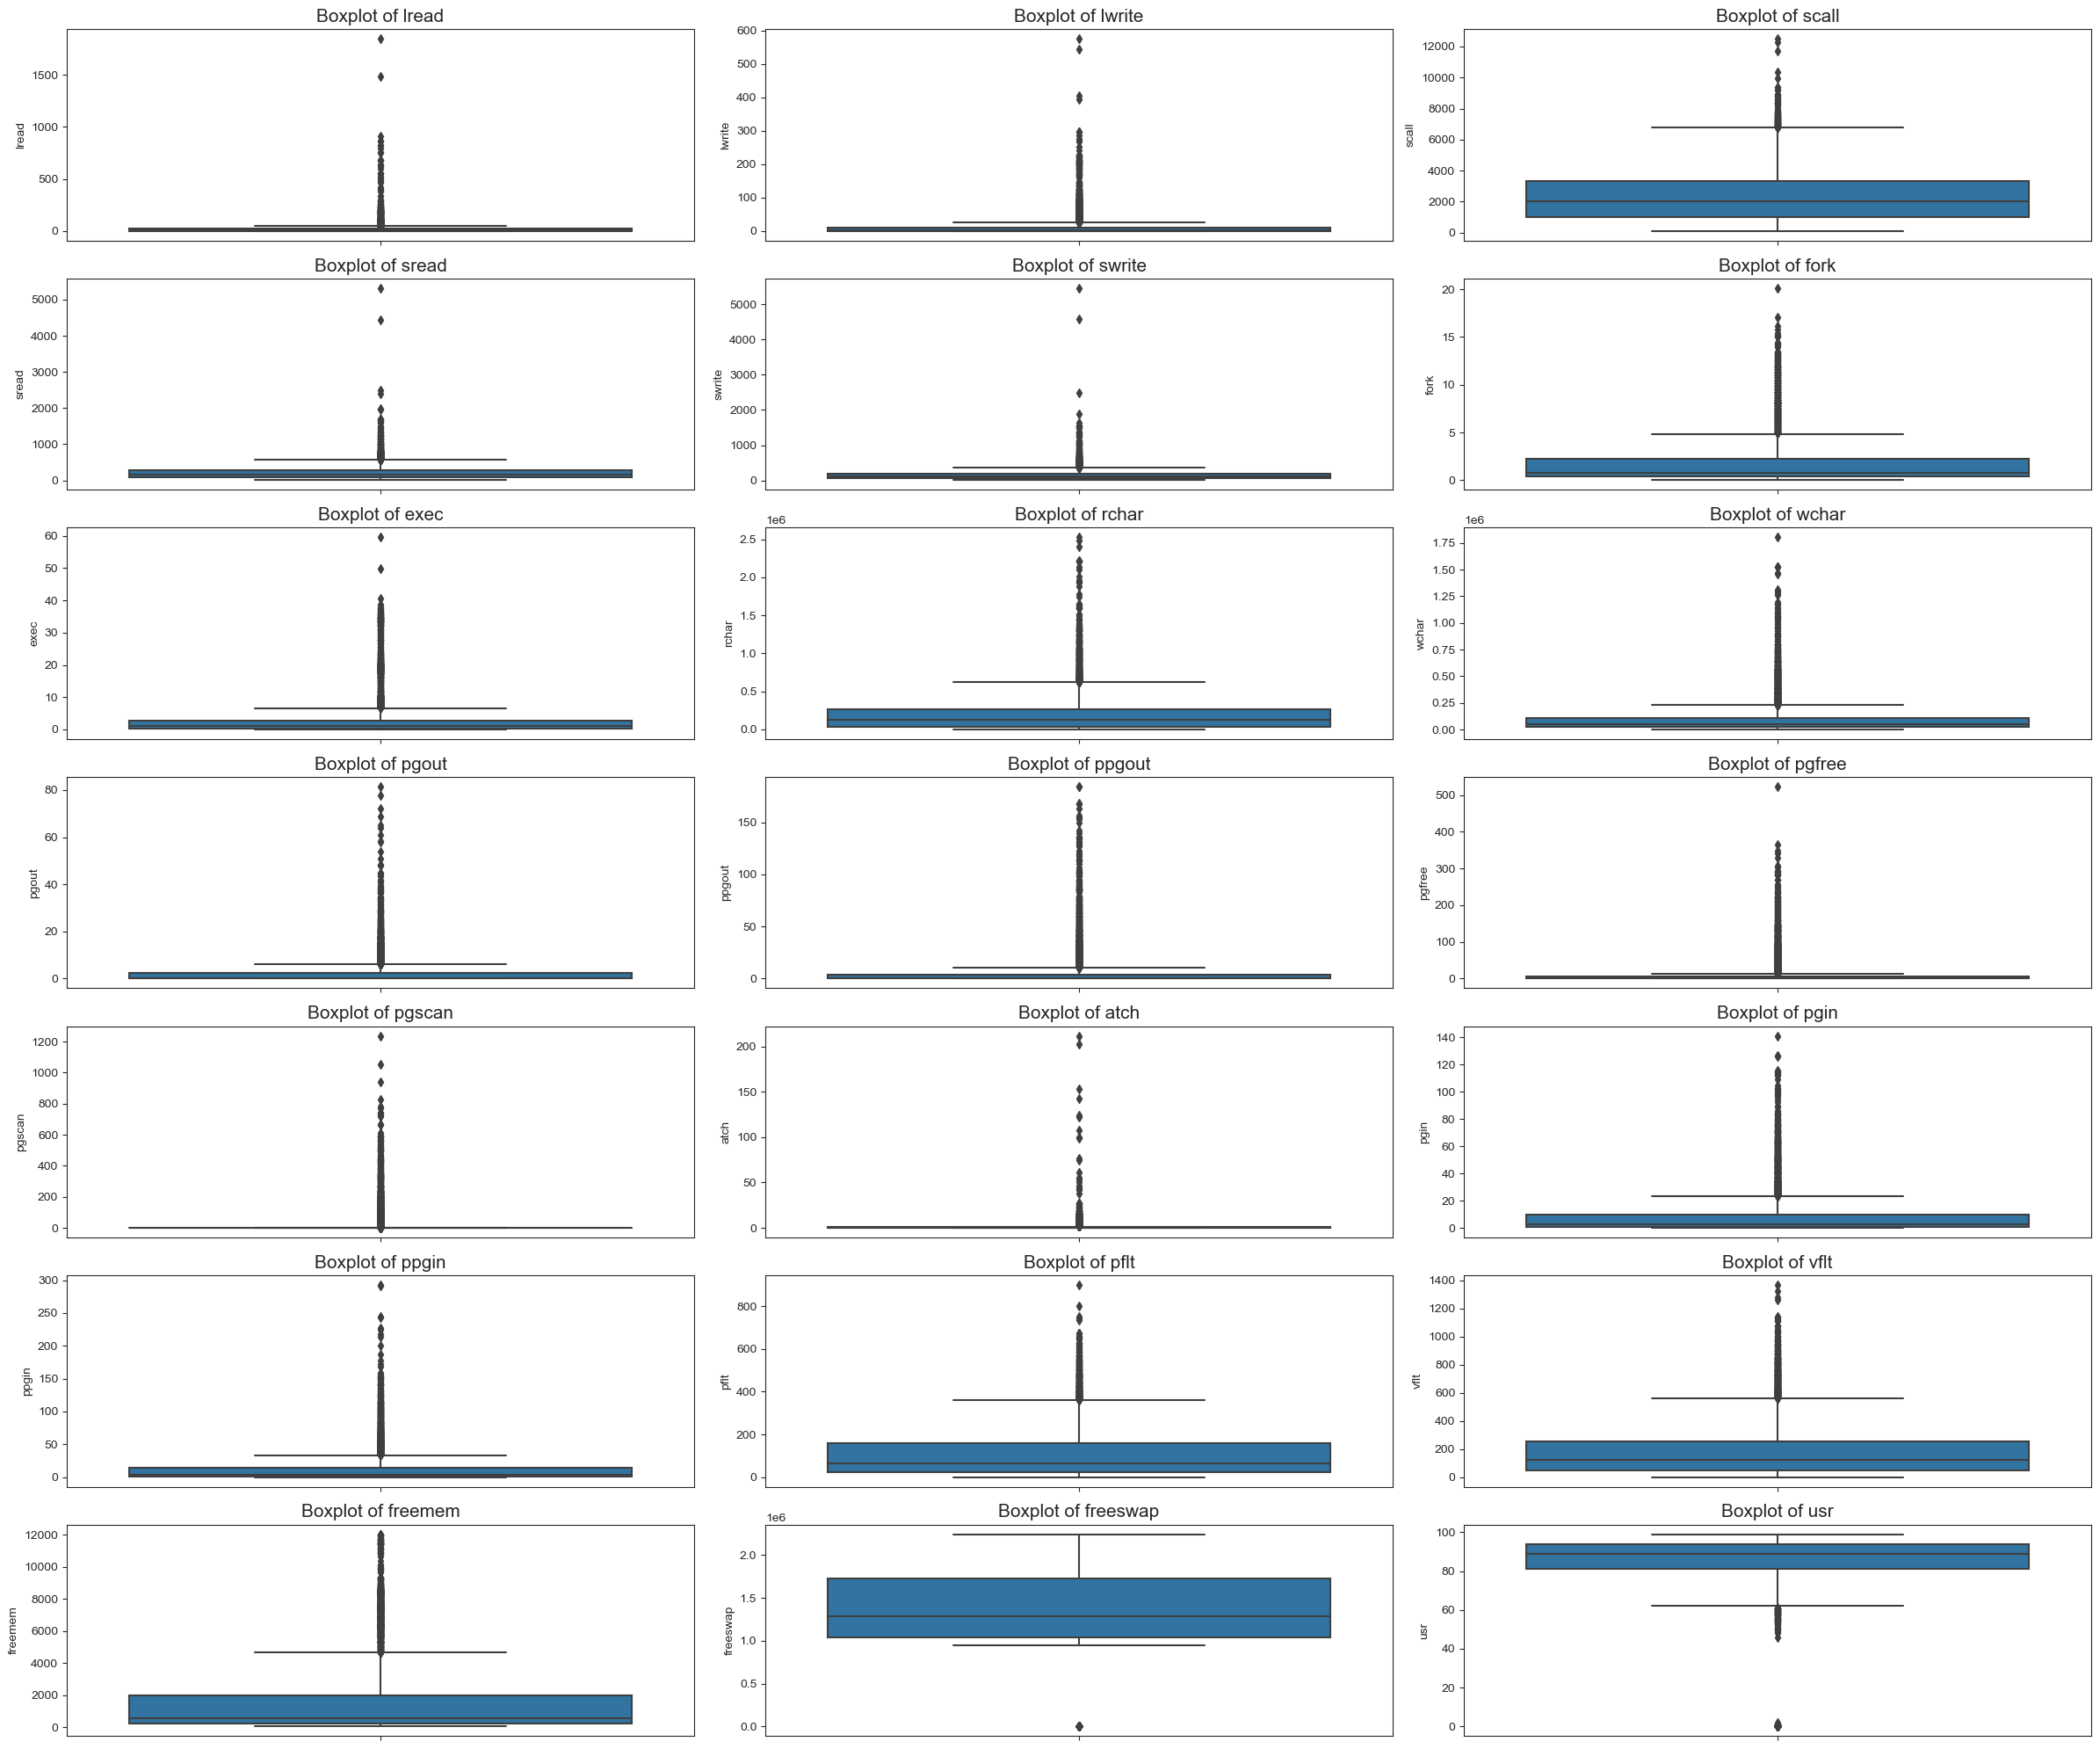

In [672]:
plt.figure(figsize = (24,20))
for i in range(len(columns)):
    plt.subplot(7,3, i + 1)
    sns.boxplot(y = df[columns[i]], data = df)
    plt.title('Boxplot of {}'.format(columns[i]),fontsize=15)
    plt.tight_layout()

In [673]:
from warnings import filterwarnings
filterwarnings("ignore")

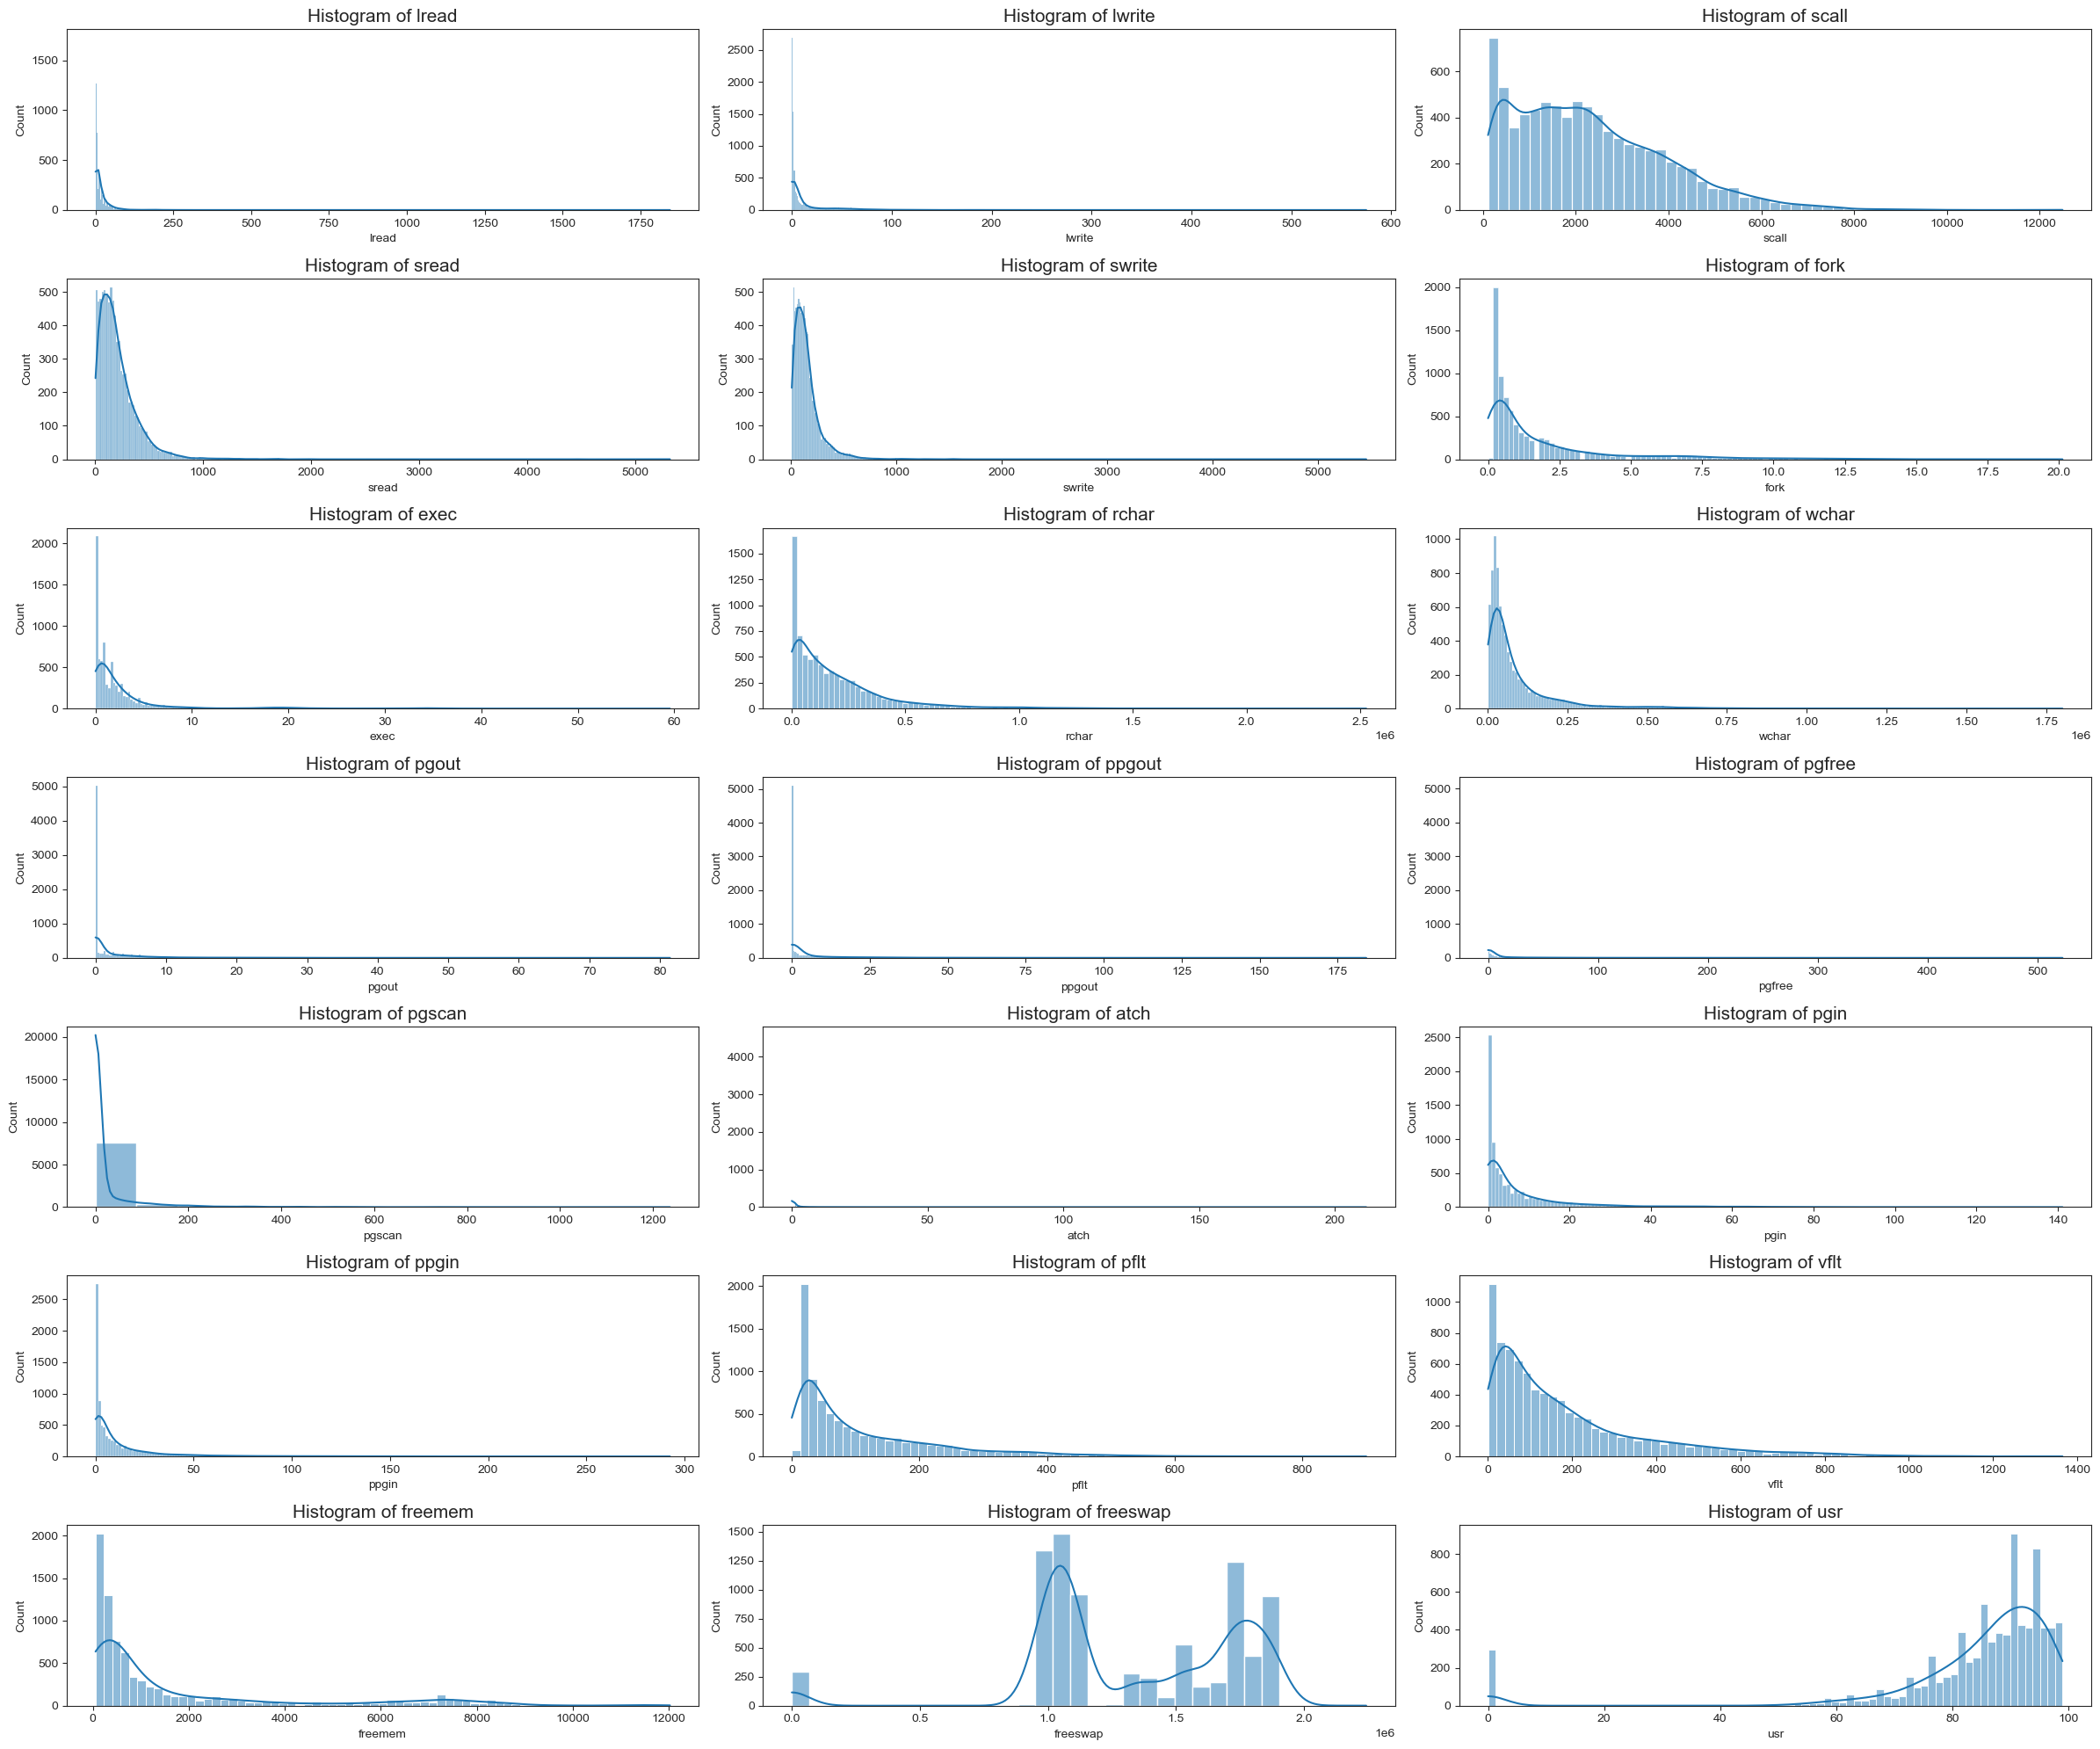

In [674]:
plt.figure(figsize = (24,20))
for i in range(len(columns)):
    plt.subplot(7,3, i + 1)
    sns.histplot(x = df[columns[i]], data = df,kde=True)
    plt.title('Histogram of {}'.format(columns[i]),fontsize=15)
    plt.tight_layout()

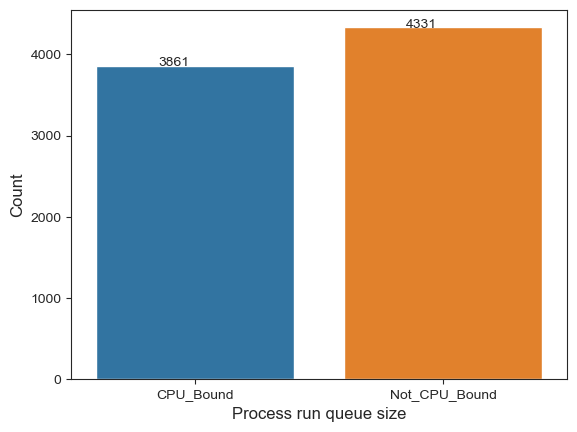

In [675]:
ax=sns.countplot(data=df,x='runqsz')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xlabel('Process run queue size',fontsize=12)
plt.ylabel('Count',fontsize=12);

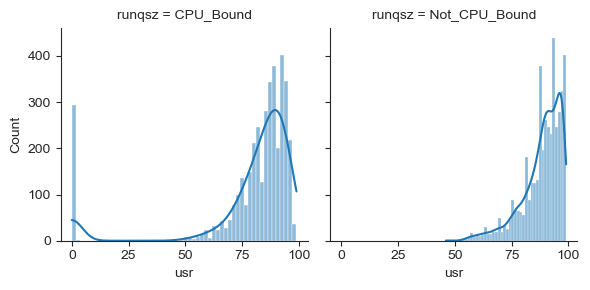

In [676]:
g=sns.FacetGrid(df,col='runqsz')
g.map(sns.histplot,'usr',kde=True);

### From the distribution we can see that the programs that are Not CPU bound (i.e)not limited by the CPU speed,have high USR.
### High USR values indicate that your programs are actively doing their work, like processing data or responding to user input.

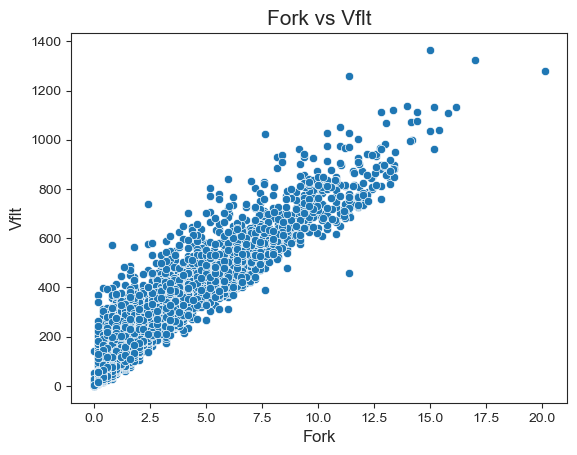

In [677]:
sns.scatterplot(data=df,x='fork',y='vflt')
plt.xlabel('Fork',fontsize=12)
plt.ylabel('Vflt',fontsize=12)
plt.title('Fork vs Vflt',fontsize=15);

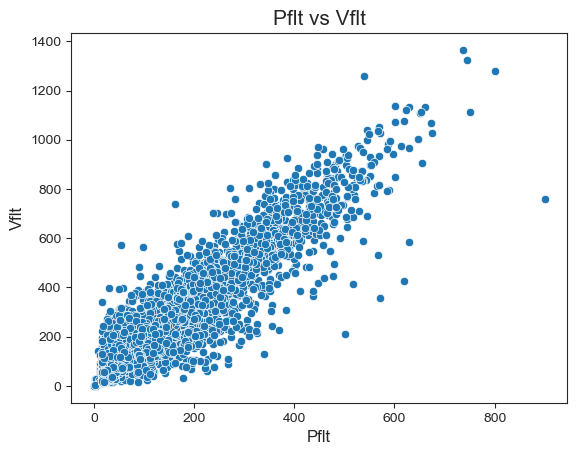

In [678]:
sns.scatterplot(data=df,x='pflt',y='vflt')
plt.xlabel('Pflt',fontsize=12)
plt.ylabel('Vflt',fontsize=12)
plt.title('Pflt vs Vflt',fontsize=15);

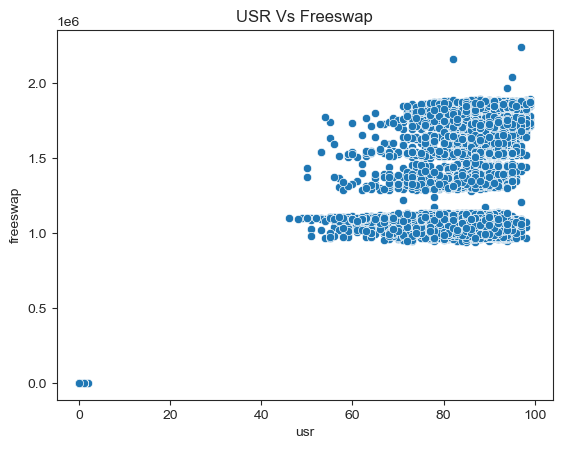

In [679]:
sns.scatterplot(data=df,x='usr',y='freeswap')
plt.title('USR Vs Freeswap');

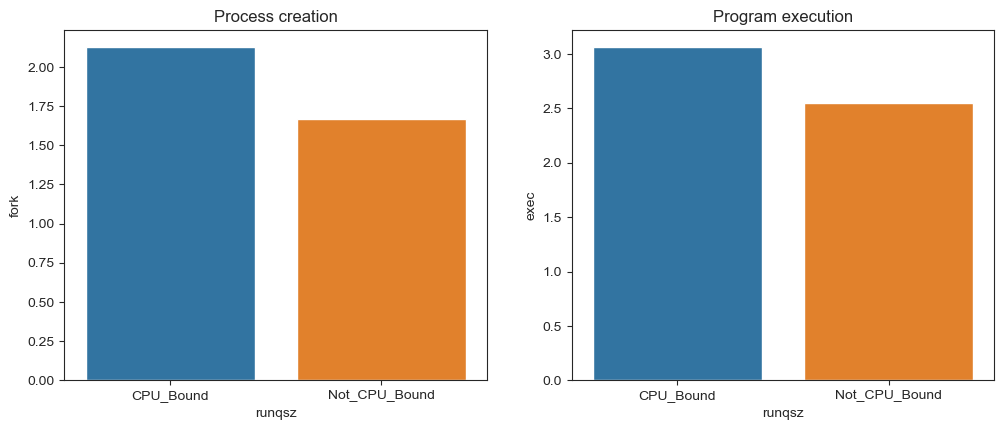

In [680]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.barplot(data=df,x='runqsz',y='fork',ci=False)
plt.title('Process creation')
plt.subplot(222)
sns.barplot(data=df,x='runqsz',y='exec',ci=False)
plt.title('Program execution');



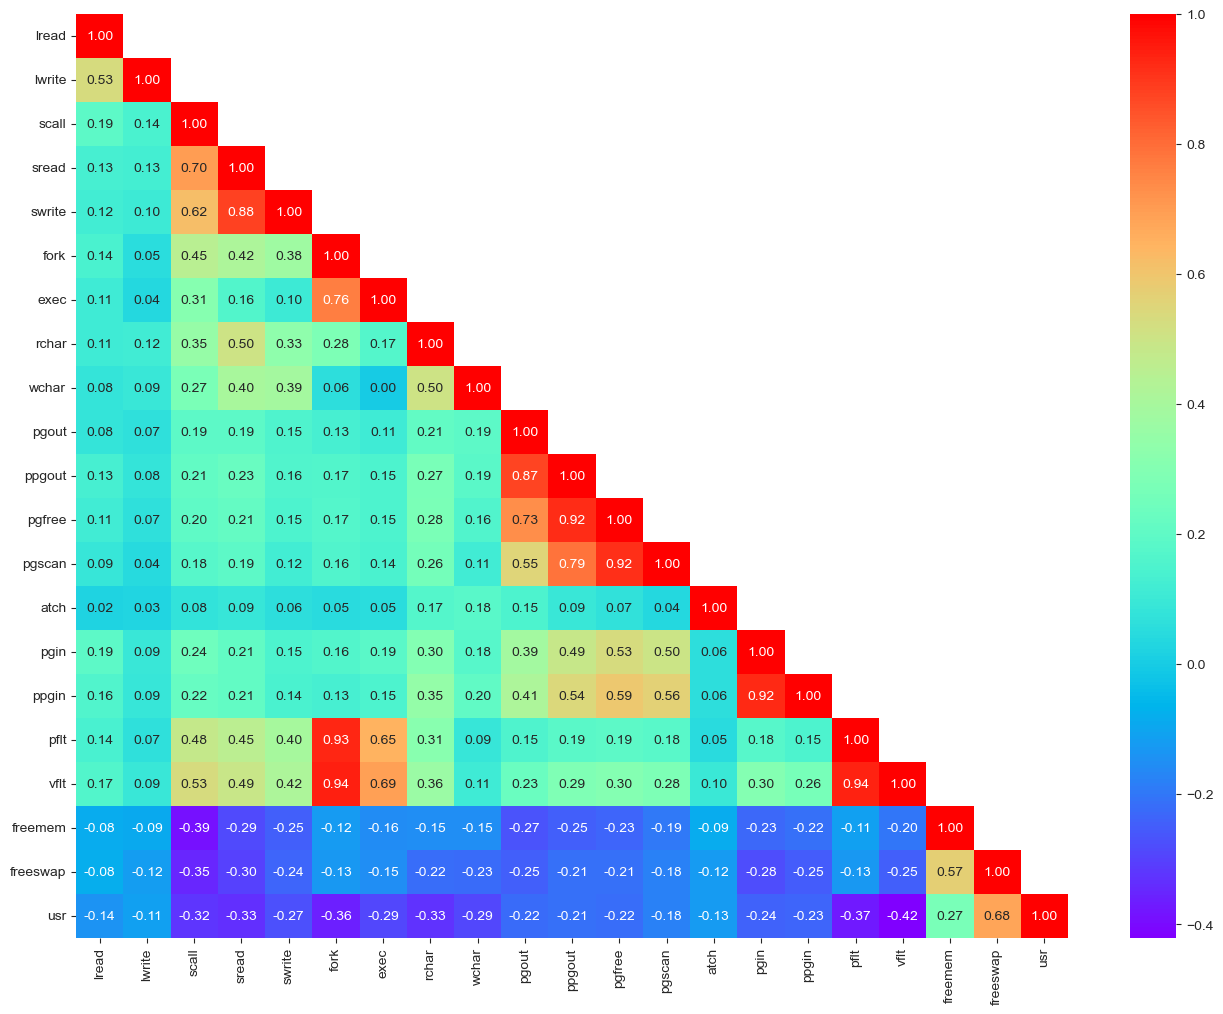

In [681]:
plt.figure(figsize=(16,12))
sns.heatmap(df_num.iloc[:,0:21].corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df_num.iloc[:,0:21].corr(),+1))
plt.show()

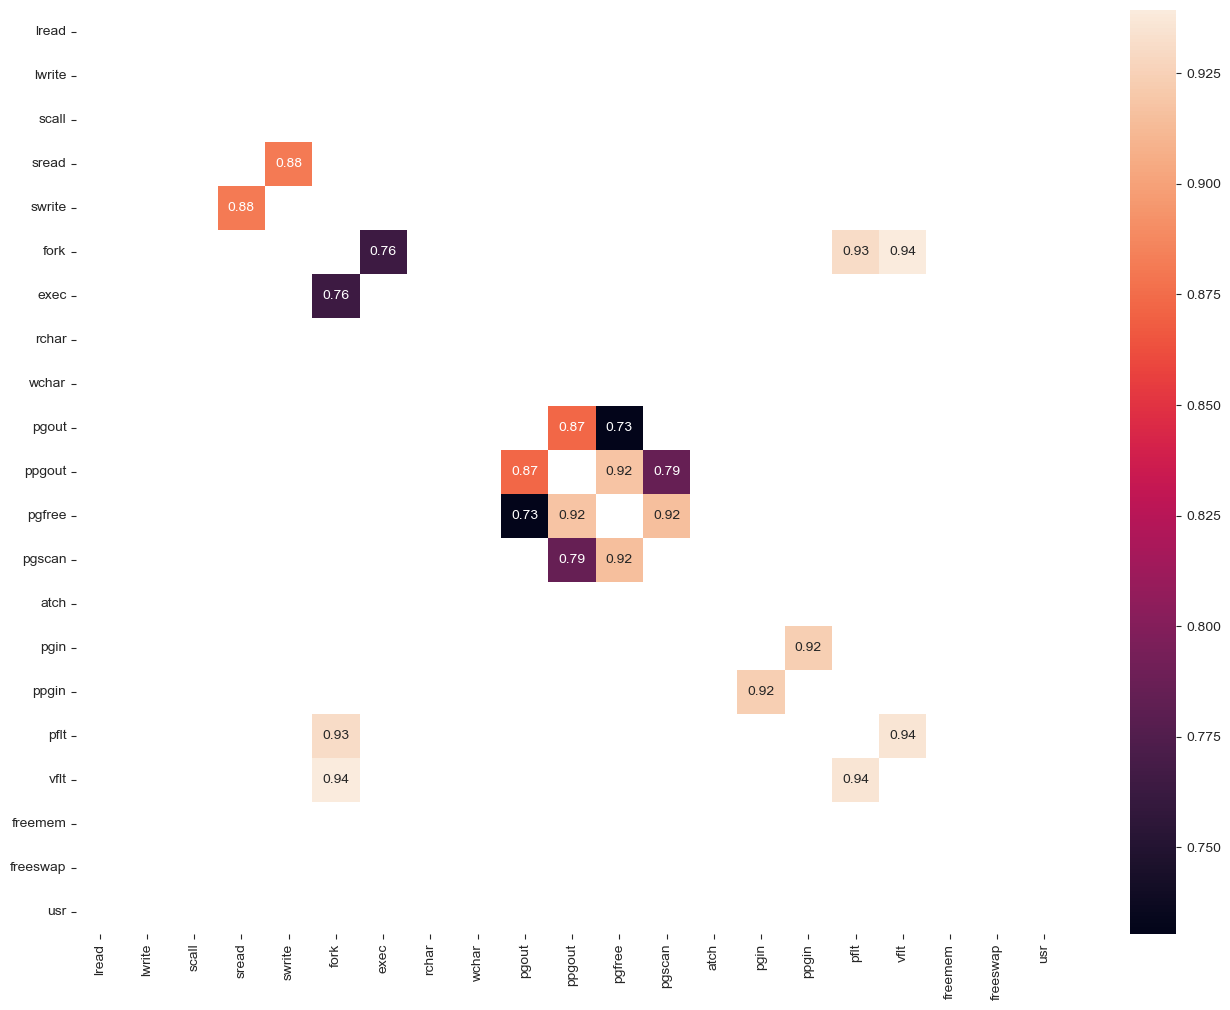

In [682]:
corr = df_num.corr()
max_corr = corr[(corr >= 0.7) & (corr < 1) ]
plt.figure(figsize=(16,12))
sns.heatmap(max_corr,annot=True);


## Treating Missing values:

In [683]:
for column in df.columns:
    if df[column].dtype != 'object':
        Median= df[column].median()
        df[column] = df[column].fillna(Median)

In [684]:
df.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [685]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

In [686]:
for i in df.columns:
    if df[i].dtype != 'object':
        LL, UL = remove_outlier(df[i])
        df[i] = np.where(df[i] > UL, UL, df[i])
        df[i] = np.where(df[i] < LL, LL, df[i])

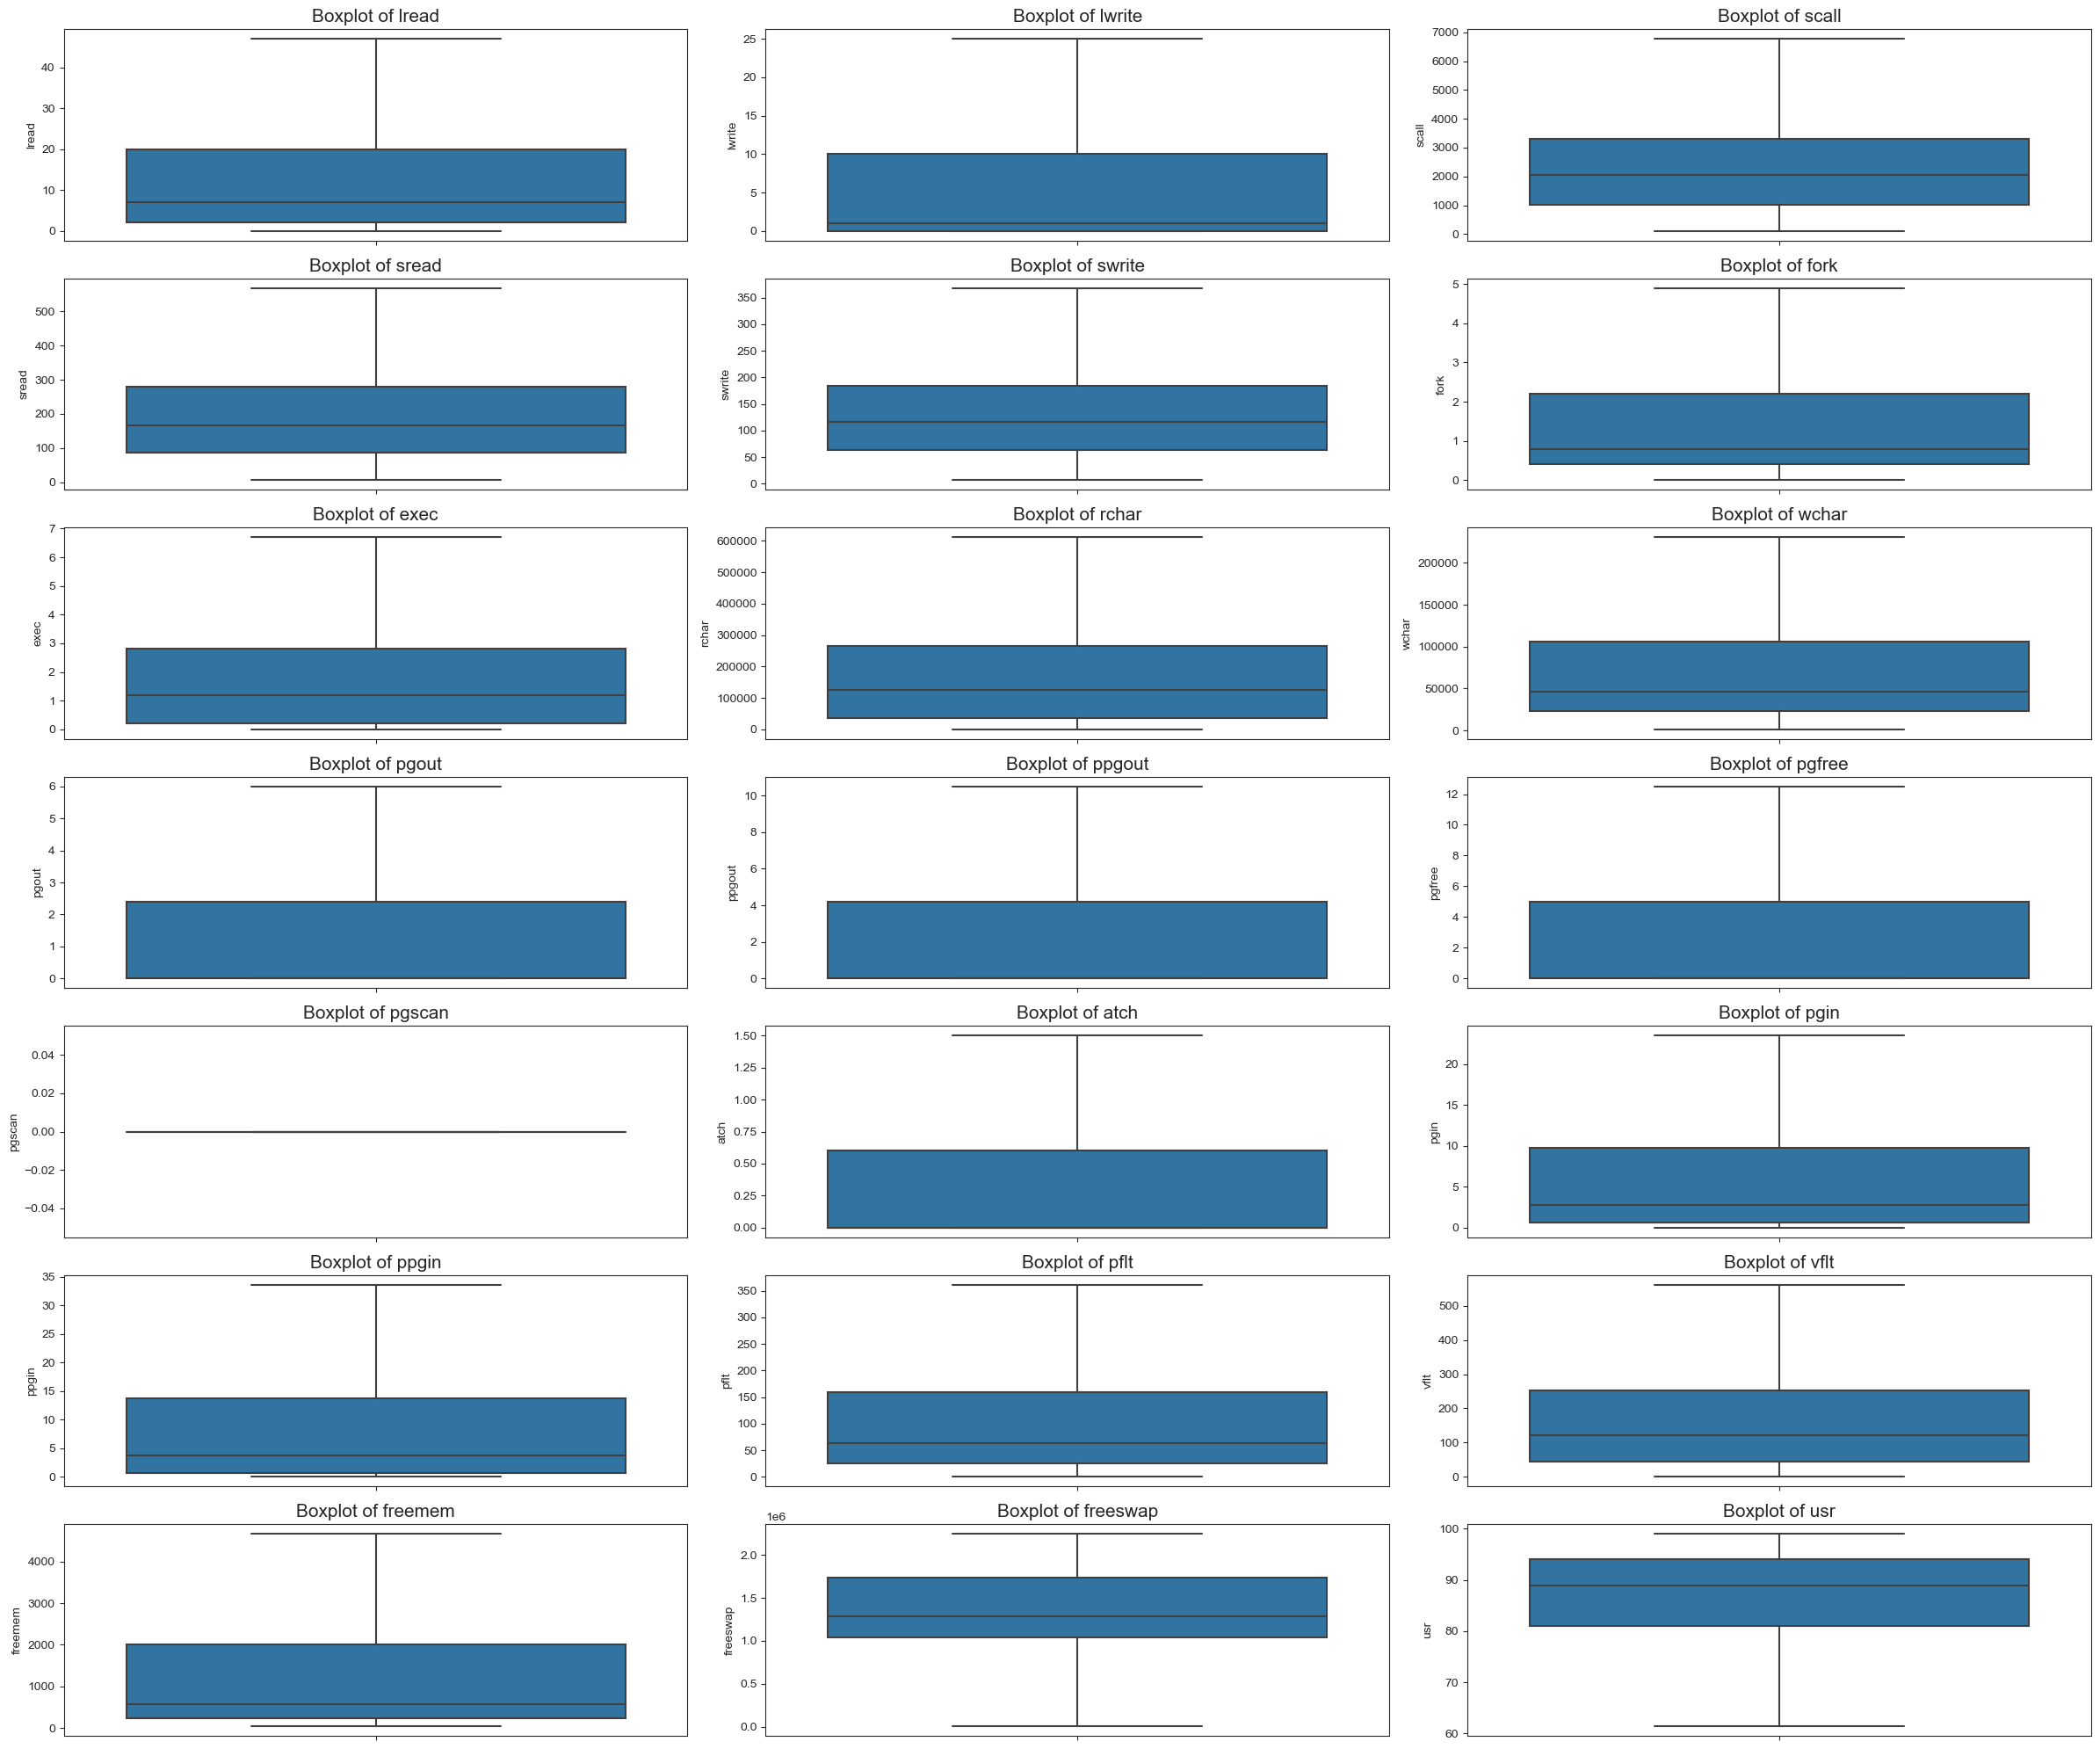

In [687]:
plt.figure(figsize = (24,20))
for i in range(len(columns)):
    plt.subplot(7,3, i + 1)
    sns.boxplot(y = df[columns[i]], data = df)
    plt.title('Boxplot of {}'.format(columns[i]),fontsize=15)
    plt.tight_layout()

In [688]:
df.describe().T

count          mean            std      min         25%        50%  \
lread     8192.0  1.342285e+01      15.159741      0.0        2.00        7.0   
lwrite    8192.0  6.657471e+00       9.291945      0.0        0.00        1.0   
scall     8192.0  2.294484e+03    1593.093446    109.0     1012.00     2051.5   
sread     8192.0  1.997764e+02     146.758932      6.0       86.00      166.0   
swrite    8192.0  1.379700e+02      97.141835      7.0       63.00      117.0   
fork      8192.0  1.557771e+00       1.591220      0.0        0.40        0.8   
exec      8192.0  1.931495e+00       2.028253      0.0        0.20        1.2   
rchar     8192.0  1.788841e+05  174589.212910    278.0    34860.50   125473.5   
wchar     8192.0  7.564554e+04   71262.958027   1498.0    22977.75    46619.0   
pgout     8192.0  1.420901e+00       2.200251      0.0        0.00        0.0   
ppgout    8192.0  2.560702e+00       4.037317      0.0        0.00        0.0   
pgfree    8192.0  3.164586e+00       4.983345      0.0        0.00        0.0   
pgscan    8192.0  0.000000e+00       0.000000      0.0        0.00        0.0   
atch      8192.0  3.882788e-01       0.562937      0.0        0.00        0.0   
pgin      8192.0  6.385262e+00       7.684420      0.0        0.60        2.8   
ppgin     8192.0  9.140437e+00      11.160927      0.0        0.60        3.8   
pflt      8192.0  1.056361e+02     101.548788      0.0       25.00       63.8   
vflt      8192.0  1.756225e+02     162.497031      0.2       45.40      120.4   
freemem   8192.0  1.387625e+03    1605.763418     55.0      231.00      579.0   
freeswap  8192.0  1.328520e+06  420782.723746  10989.5  1042623.50  1289289.5   
usr       8192.0  8.624622e+01       9.748585     61.5       81.00       89.0   

                  75%           max  
lread          20.000  4.700000e+01  
lwrite         10.000  2.500000e+01  
scall        3317.250  6.775125e+03  
sread         279.000  5.685000e+02  
swrite        185.000  3.680000e+02  
fork            2.200  4.900000e+00  
exec            2.800  6.700000e+00  
rchar      265394.750  6.111961e+05  
wchar      106037.000  2.306259e+05  
pgout           2.400  6.000000e+00  
ppgout          4.200  1.050000e+01  
pgfree          5.000  1.250000e+01  
pgscan          0.000  0.000000e+00  
atch            0.600  1.500000e+00  
pgin            9.765  2.351250e+01  
ppgin          13.800  3.360000e+01  
pflt          159.600  3.615000e+02  
vflt          251.800  5.614000e+02  
freemem      2002.250  4.659125e+03  
freeswap  1730379.500  2.243187e+06  
usr            94.000  9.900000e+01

In [689]:
df.duplicated().sum()

0

In [690]:
df1= pd.get_dummies(df, columns=["runqsz"], drop_first=True)
df1.head()

lread  lwrite   scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0    1.0     0.0  2147.0   79.0    68.0   0.2   0.2   40671.0  53995.0    0.0   
1    0.0     0.0   170.0   18.0    21.0   0.2   0.2     448.0   8385.0    0.0   
2   15.0     3.0  2162.0  159.0   119.0   2.0   2.4  125473.5  31950.0    0.0   
3    0.0     0.0   160.0   12.0    16.0   0.2   0.2  125473.5   8670.0    0.0   
4    5.0     1.0   330.0   39.0    38.0   0.4   0.4  125473.5  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt   freemem   freeswap   usr  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40  4659.125  1730946.0  95.0   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  4659.125  1869002.0  97.0   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20   702.000  1021237.0  87.0   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  4659.125  1863704.0  98.0   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60   633.000  1760253.0  90.0   

   runqsz_Not_CPU_Bound  
0                 False  
1                  True  
2                  True  
3                  True  
4                  True  

[5 rows x 22 columns]

In [691]:
df['runqsz'].value_counts()

runqsz
Not_CPU_Bound    4331
CPU_Bound        3861
Name: count, dtype: int64

In [692]:
df1['runqsz_Not_CPU_Bound']=df1['runqsz_Not_CPU_Bound'].astype('int')

In [693]:
df1.head()

lread  lwrite   scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0    1.0     0.0  2147.0   79.0    68.0   0.2   0.2   40671.0  53995.0    0.0   
1    0.0     0.0   170.0   18.0    21.0   0.2   0.2     448.0   8385.0    0.0   
2   15.0     3.0  2162.0  159.0   119.0   2.0   2.4  125473.5  31950.0    0.0   
3    0.0     0.0   160.0   12.0    16.0   0.2   0.2  125473.5   8670.0    0.0   
4    5.0     1.0   330.0   39.0    38.0   0.4   0.4  125473.5  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt   freemem   freeswap   usr  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40  4659.125  1730946.0  95.0   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  4659.125  1869002.0  97.0   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20   702.000  1021237.0  87.0   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  4659.125  1863704.0  98.0   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60   633.000  1760253.0  90.0   

   runqsz_Not_CPU_Bound  
0                     0  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 22 columns]

In [694]:
df1['runqsz_Not_CPU_Bound'].value_counts()

runqsz_Not_CPU_Bound
1    4331
0    3861
Name: count, dtype: int64

In [695]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lread                 8192 non-null   float64
 1   lwrite                8192 non-null   float64
 2   scall                 8192 non-null   float64
 3   sread                 8192 non-null   float64
 4   swrite                8192 non-null   float64
 5   fork                  8192 non-null   float64
 6   exec                  8192 non-null   float64
 7   rchar                 8192 non-null   float64
 8   wchar                 8192 non-null   float64
 9   pgout                 8192 non-null   float64
 10  ppgout                8192 non-null   float64
 11  pgfree                8192 non-null   float64
 12  pgscan                8192 non-null   float64
 13  atch                  8192 non-null   float64
 14  pgin                  8192 non-null   float64
 15  ppgin                

In [696]:
df1.runqsz_Not_CPU_Bound.value_counts()

runqsz_Not_CPU_Bound
1    4331
0    3861
Name: count, dtype: int64

## Splitting the dataset 

In [697]:
x = df1.drop('usr', axis=1)
y = df1.pop('usr')

In [698]:
y.shape

(8192,)

In [699]:
x.shape

(8192, 21)

In [700]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3 , random_state=1)

In [701]:
X_train.shape

(5734, 21)

In [702]:
X_test.shape

(2458, 21)

# Linear Regression using statsmodel(OLS)

In [703]:
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)

In [704]:
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1115.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:06:16   Log-Likelihood:                -16657.
No. Observations:                5734   AIC:                         3.336e+04
Df Residuals:                    5713   BIC:                         3.350e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1217 

In [705]:
print('The variation in the independent variable which is explained by the dependent variable is',round(model.rsquared*100,4),'%')

The variation in the independent variable which is explained by the dependent variable is 79.6109 %


In [706]:
vif_series1= pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   29.229332
lread                    5.350560
lwrite                   4.328397
scall                    2.960609
sread                    6.420172
swrite                   5.597135
fork                    13.035359
exec                     3.241417
rchar                    2.133616
wchar                    1.584381
pgout                   11.360363
ppgout                  29.404223
pgfree                  16.496748
pgscan                        NaN
atch                     1.875901
pgin                    13.809339
ppgin                   13.951855
pflt                    12.001460
vflt                    15.971049
freemem                  1.961304
freeswap                 1.841239
runqsz_Not_CPU_Bound     1.156815
dtype: float64



### We could see that variables like sread,swrite,fork,pgout,pgfree etc have high VIF.
### This could mean that there is multicolinearity in the data
### Let's drop multicollinear columns one by one and observe the effect on our model.

In [707]:
np.round(model.rsquared_adj,3)

0.795

In [708]:
X_train2 = X_train.drop(["ppgout"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


### We could see that there is no change in the R squared and adjusted R

## Dropping ppgout

In [709]:
X_train=X_train.drop('ppgout',axis=1)

In [710]:
olsmod_1 = sm.OLS(y_train, X_train)
olsres_1 = olsmod_1.fit()
print(olsres_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1174.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:06:17   Log-Likelihood:                -16658.
No. Observations:                5734   AIC:                         3.336e+04
Df Residuals:                    5714   BIC:                         3.349e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1477 

In [711]:
vif_series2= pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                   29.021961
lread                    5.350387
lwrite                   4.328325
scall                    2.960379
sread                    6.420135
swrite                   5.597025
fork                    13.027305
exec                     3.239231
rchar                    2.133614
wchar                    1.580894
pgout                    6.453978
pgfree                   6.172847
pgscan                        NaN
atch                     1.875553
pgin                    13.784007
ppgin                   13.898848
pflt                    12.001460
vflt                    15.966865
freemem                  1.959267
freeswap                 1.838167
runqsz_Not_CPU_Bound     1.156421
dtype: float64



## Dropping pgscan

In [712]:
X_train3 = X_train.drop(["pgscan"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [713]:
X_train=X_train.drop('pgscan',axis=1)

In [714]:
X_train4 = X_train.drop(["vflt"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train4)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


## Dropping vflt

In [715]:
X_train=X_train.drop('vflt',axis=1)

In [716]:
print(olsres_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1235.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:06:17   Log-Likelihood:                -16665.
No. Observations:                5734   AIC:                         3.337e+04
Df Residuals:                    5715   BIC:                         3.349e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0090 

In [717]:
vif_series3= pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const                   28.641818
lread                    5.335455
lwrite                   4.327130
scall                    2.952947
sread                    6.374687
swrite                   5.595777
fork                    10.089700
exec                     3.235396
rchar                    2.123783
wchar                    1.558923
pgout                    6.450724
pgfree                   6.149223
atch                     1.864254
pgin                    13.602134
ppgin                   13.898845
pflt                     9.131802
freemem                  1.957966
freeswap                 1.787695
runqsz_Not_CPU_Bound     1.156363
dtype: float64



In [718]:
X_train5 = X_train.drop(["ppgin"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train5)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

R-squared: 0.795 
Adjusted R-squared: 0.795


In [719]:
0.796-.795

0.0010000000000000009

### As the drop is negligible,we are dropping ppgin

## Dropping ppgin

In [720]:
X_train=X_train.drop('ppgin',axis=1)

In [721]:
vif_series4= pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series4))

VIF values: 

const                   28.594882
lread                    5.304009
lwrite                   4.316362
scall                    2.951826
sread                    6.374556
swrite                   5.595670
fork                    10.074886
exec                     3.235387
rchar                    2.090401
wchar                    1.558921
pgout                    6.445478
pgfree                   6.093623
atch                     1.863536
pgin                     1.529142
pflt                     9.131545
freemem                  1.957713
freeswap                 1.785393
runqsz_Not_CPU_Bound     1.155990
dtype: float64



In [722]:
X_train6 = X_train.drop(["fork"], axis=1)
olsmod_5 = sm.OLS(y_train, X_train6)
olsres_5= olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 3),
)

R-squared: 0.795 
Adjusted R-squared: 0.794


## R square Remains the same

## Dropping fork

In [723]:
X_train=X_train.drop('fork',axis=1)

In [724]:
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1386.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:06:17   Log-Likelihood:                -16672.
No. Observations:                5734   AIC:                         3.338e+04
Df Residuals:                    5717   BIC:                         3.349e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0913 

In [725]:
vif_series5= pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series5))

VIF values: 

const                   28.440419
lread                    5.285069
lwrite                   4.298019
scall                    2.914853
sread                    6.373458
swrite                   5.390263
exec                     2.856973
rchar                    2.089364
wchar                    1.550686
pgout                    6.445377
pgfree                   6.093041
atch                     1.862553
pgin                     1.526800
pflt                     3.458168
freemem                  1.957226
freeswap                 1.782829
runqsz_Not_CPU_Bound     1.155448
dtype: float64



In [726]:
X_train7 = X_train.drop(["pgout"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train7)
olsres_6= olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.794 
Adjusted R-squared: 0.793


In [727]:
X_train8 = X_train.drop(["sread"], axis=1)
olsmod_7 = sm.OLS(y_train, X_train8)
olsres_7= olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
)

R-squared: 0.795 
Adjusted R-squared: 0.794


Both remains the same.

## Dropping sread

In [728]:
X_train=X_train.drop('sread',axis=1)

In [729]:
vif_series6= pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series6))

VIF values: 

const                   28.366808
lread                    5.277543
lwrite                   4.288733
scall                    2.657189
swrite                   3.013887
exec                     2.850220
rchar                    1.673113
wchar                    1.537416
pgout                    6.444663
pgfree                   6.092363
atch                     1.861273
pgin                     1.525797
pflt                     3.436271
freemem                  1.956658
freeswap                 1.769115
runqsz_Not_CPU_Bound     1.155441
dtype: float64



In [730]:
X_train9 = X_train.drop(["pgfree"], axis=1)
olsmod_8 = sm.OLS(y_train, X_train9)
olsres_8= olsmod_8.fit()
print(
    "R-squared:",
    np.round(olsres_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_8.rsquared_adj, 3),
)

R-squared: 0.795 
Adjusted R-squared: 0.794


## Dropping pgfree

In [731]:
X_train=X_train.drop('pgfree',axis=1)

In [732]:
vif_series7= pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series7))

VIF values: 

const                   28.366778
lread                    5.272488
lwrite                   4.282984
scall                    2.653943
swrite                   3.012451
exec                     2.847353
rchar                    1.672481
wchar                    1.537067
pgout                    2.029172
atch                     1.860242
pgin                     1.497984
pflt                     3.436202
freemem                  1.945888
freeswap                 1.767780
runqsz_Not_CPU_Bound     1.155214
dtype: float64



In [733]:
X_train10 = X_train.drop(["lread"], axis=1)
olsmod_9 = sm.OLS(y_train, X_train10)
olsres_9= olsmod_9.fit()
print(
    "R-squared:",
    np.round(olsres_9.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_9.rsquared_adj, 3),
)

R-squared: 0.793 
Adjusted R-squared: 0.792


In [734]:
X_train11 = X_train.drop(["lwrite"], axis=1)
olsmod_10 = sm.OLS(y_train, X_train11)
olsres_10= olsmod_10.fit()
print(
    "R-squared:",
    np.round(olsres_10.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_10.rsquared_adj, 3),
)

R-squared: 0.794 
Adjusted R-squared: 0.794


### As the drop is only 0.001 we are proceeding to drop lwrite

## Dropping lwrite

In [735]:
X_train=X_train.drop('lwrite',axis=1)

In [736]:
vif_series8= pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series8))

VIF values: 

const                   28.299206
lread                    1.294870
scall                    2.650952
swrite                   3.012182
exec                     2.834855
rchar                    1.672218
wchar                    1.528722
pgout                    2.028322
atch                     1.859941
pgin                     1.468363
pflt                     3.300995
freemem                  1.944841
freeswap                 1.767776
runqsz_Not_CPU_Bound     1.148773
dtype: float64



In [737]:
olsmod_10 = sm.OLS(y_train, X_train)
olsres_10 = olsmod_10.fit()
print(olsres_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1700.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:06:18   Log-Likelihood:                -16681.
No. Observations:                5734   AIC:                         3.339e+04
Df Residuals:                    5720   BIC:                         3.348e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1528 

## All the P values are less than 0.05

### Testing the Assumptions of Linear Regression 

##### For Linear Regression, we need to check if the following assumptions hold:-

1. Linearity 
2. Independence 
3. Homoscedasticity
4. Normality of error terms
5. No strong Multicollinearity

In [738]:
X_train.head()

const  lread   scall  swrite  exec     rchar       wchar  pgout  atch  \
694     1.0    1.0  1345.0   192.0   0.6  198703.0  230625.875   0.60   1.5   
5535    1.0    1.0  1429.0    67.0   0.2    7163.0   24842.000   0.00   0.0   
4244    1.0   47.0  3273.0   180.0   0.4   83246.0   53705.000   5.39   1.5   
2472    1.0   13.0  4349.0   191.0   3.0   96009.0   70467.000   0.00   0.0   
7052    1.0   17.0   225.0    13.0   1.6   17132.0   12514.000   0.00   0.0   

      pgin    pflt  freemem   freeswap  runqsz_Not_CPU_Bound  
694   3.80   28.20    121.0  1375446.0                     0  
5535  1.60   15.77   1476.0  1021541.0                     1  
4244  3.99   59.88     82.0    10989.5                     0  
2472  2.80  129.00    772.0   993909.0                     0  
7052  0.00   19.80   4179.0  1821682.0                     1

In [739]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()
df_pred["Fitted Values"] = olsres_10.fittedvalues.values  
df_pred["Residuals"] = olsres_10.resid.values

df_pred.head()

Actual Values  Fitted Values  Residuals
0           91.0      91.159347  -0.159347
1           94.0      91.813376   2.186624
2           61.5      74.582362 -13.082362
3           83.0      80.712751   2.287249
4           94.0      97.667798  -3.667798

### TEST FOR LINEARITY AND INDEPENDENCE

* predictor variables must have a linear relation with the dependent variable.

**How to check linearity?**

* Make a plot of fitted values vs residuals. If they don't follow any pattern (the curve is a straight line), then we say the model is linear otherwise model is showing signs of non-linearity.

**How to fix if this assumption is not followed?**

* We can try different transformations.

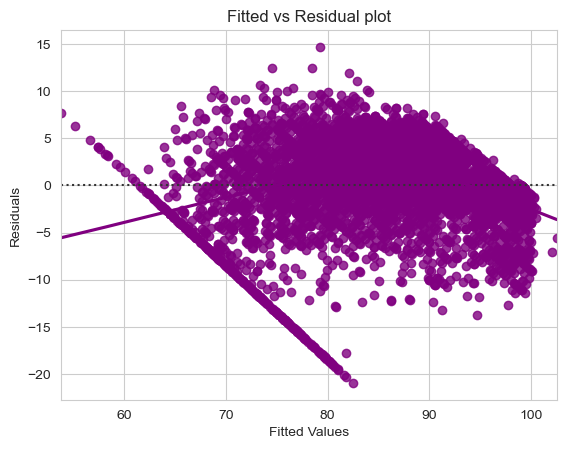

In [740]:

sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

In [741]:
X_train.columns

Index(['const', 'lread', 'scall', 'swrite', 'exec', 'rchar', 'wchar', 'pgout',
       'atch', 'pgin', 'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

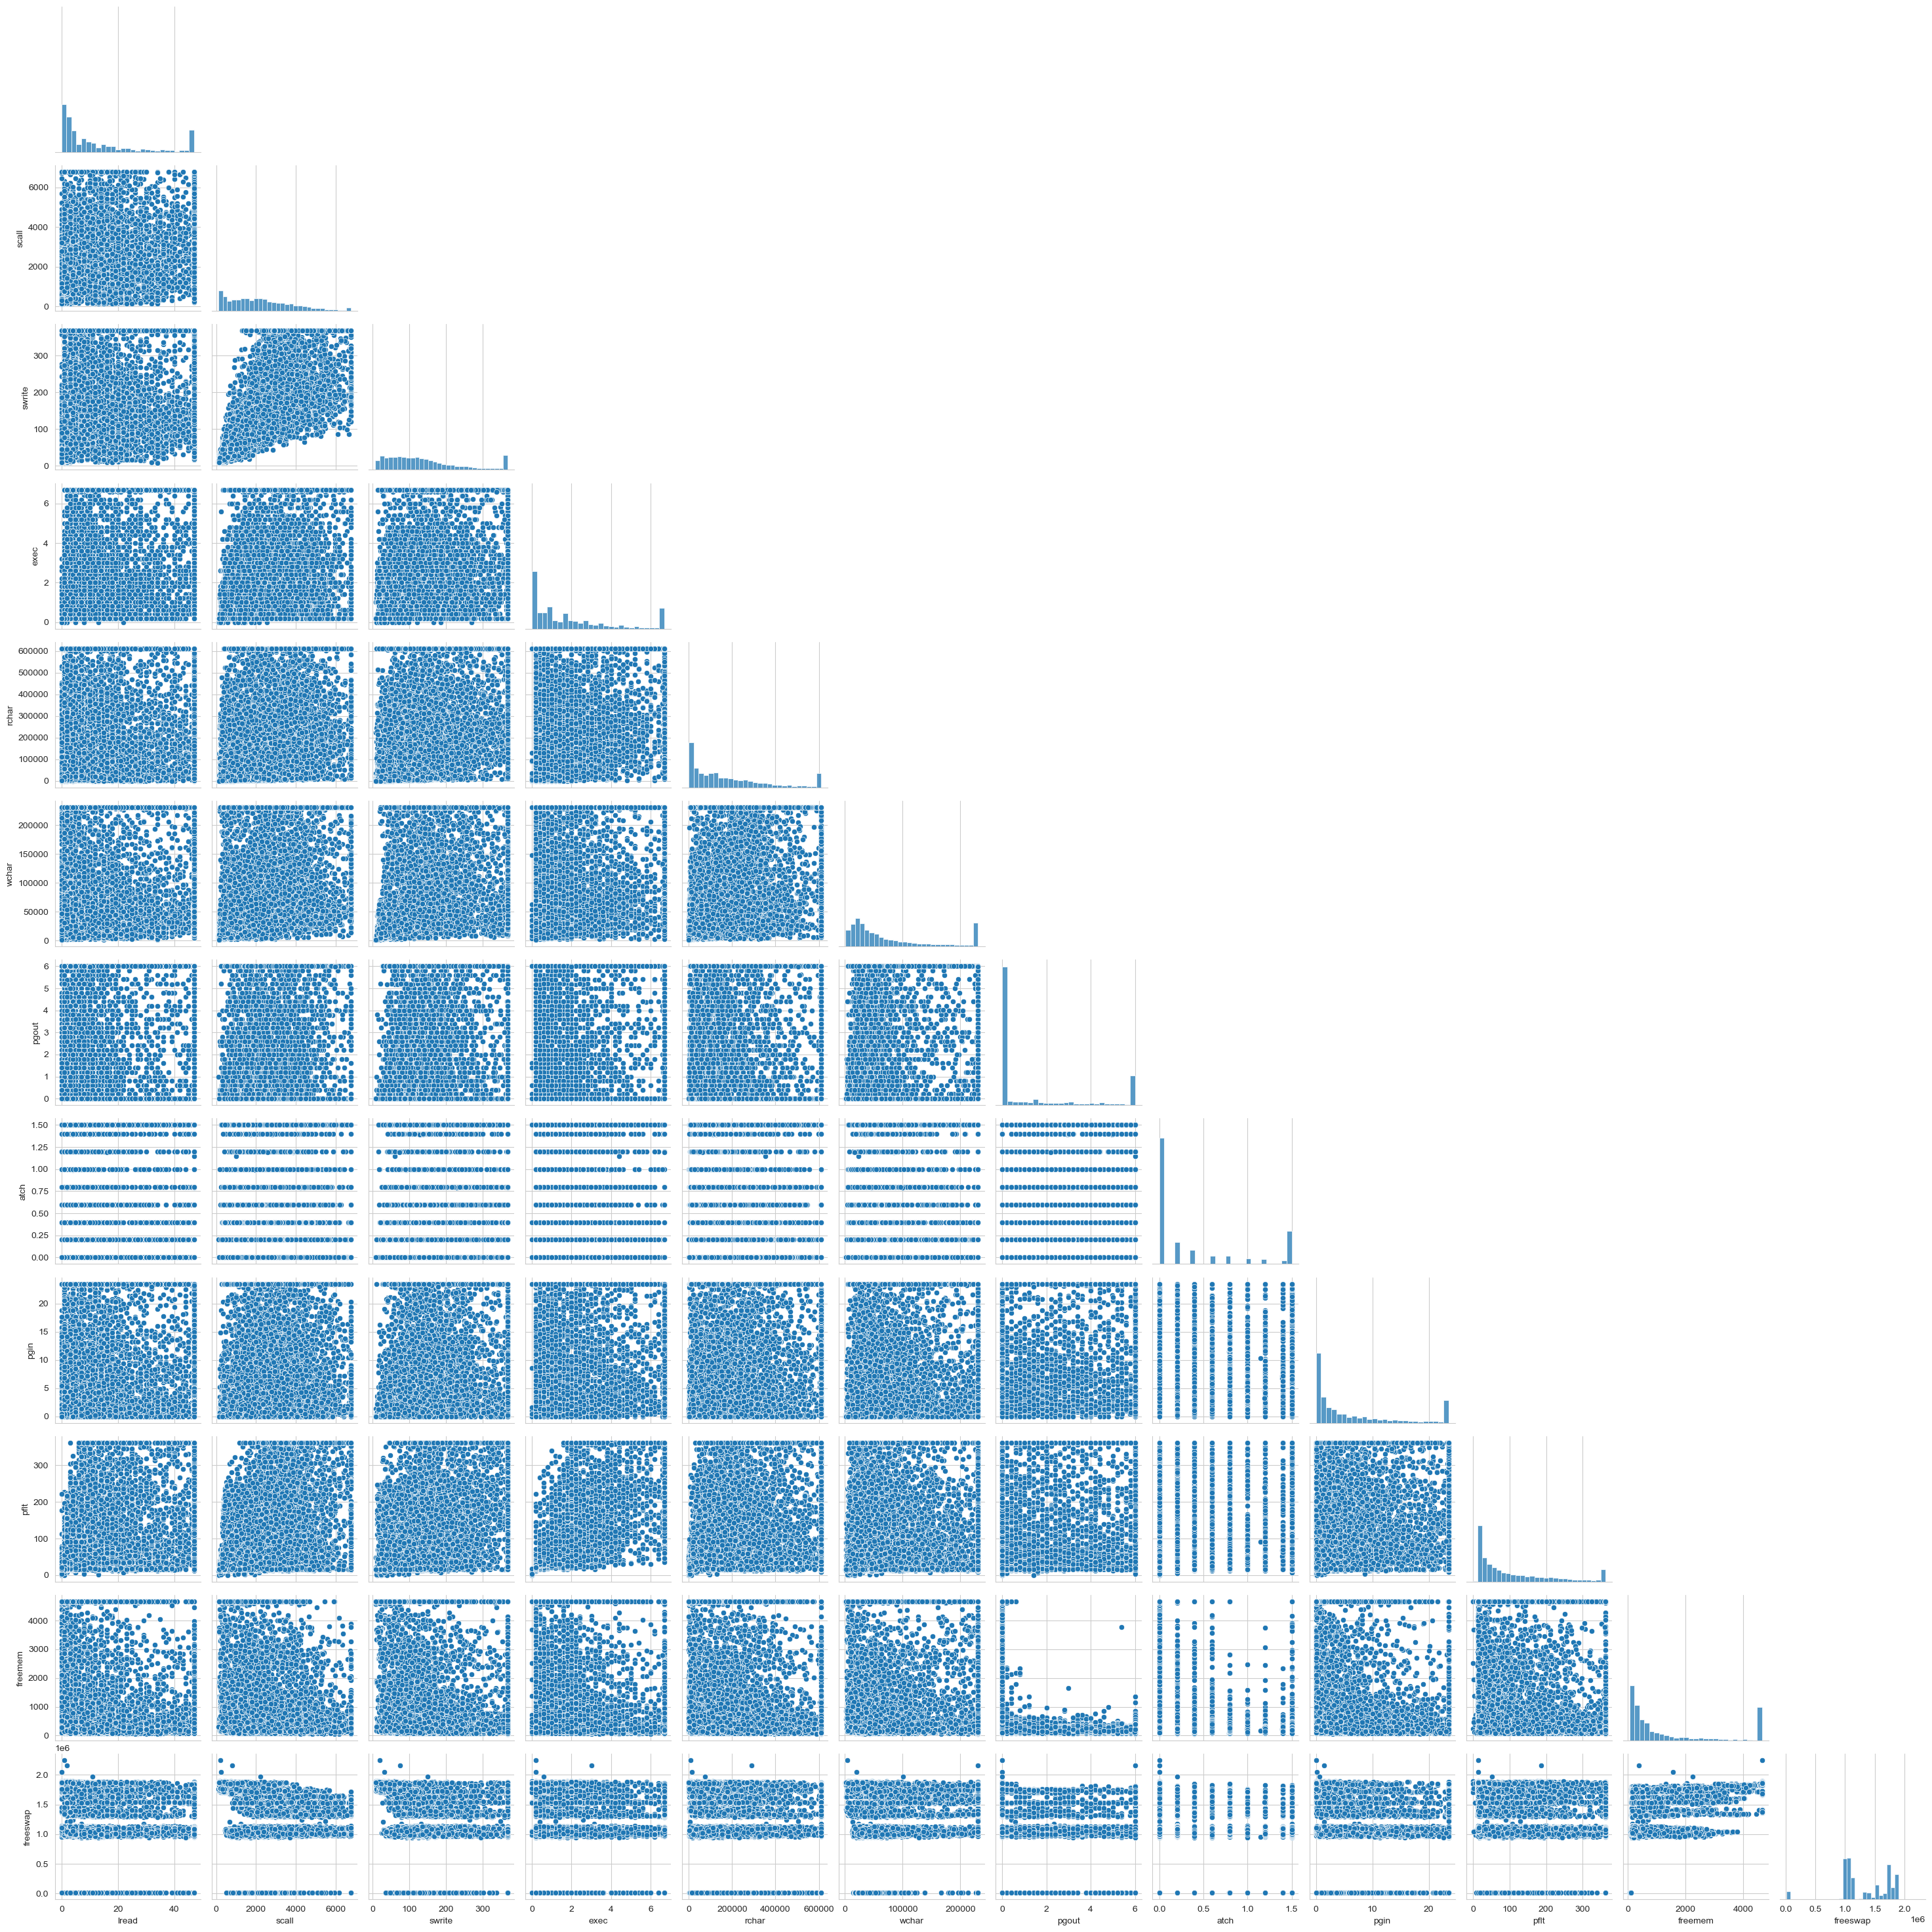

In [742]:

sns.pairplot(df1[["lread", "scall", "swrite", "exec", "rchar",'wchar','pgout','atch','pgin','pflt','freemem','freeswap']],corner=True)
plt.show()

### There seem no pattern in the data.Thus we can confirm that the residuals are independent and the dependent and independent variables are linearly related.

## Test For Normality

In [743]:
import scipy.stats as stats
import pylab

In [744]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9426957964897156, pvalue=1.6507295909746345e-42)

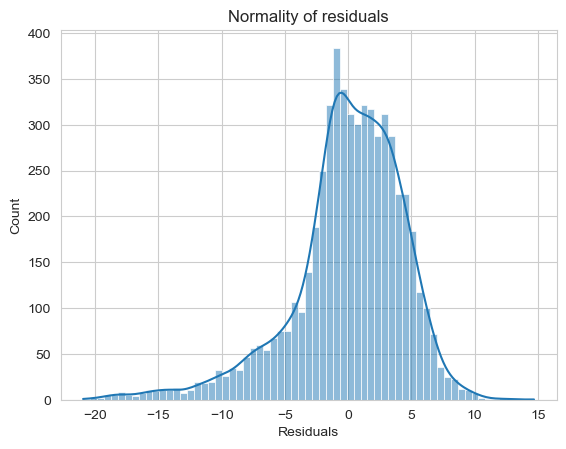

In [745]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

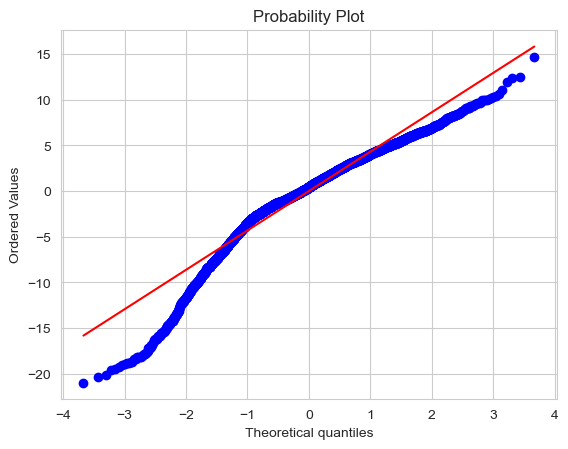

In [746]:
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

The null and alternate hypotheses of the goldfeldquandt test are as follows:

* Null hypothesis : Residuals are homoscedastic
* Alternate hypothesis : Residuals have hetroscedasticity

In [747]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [748]:
import statsmodels.stats.api as sms
sms.het_goldfeldquandt(df_pred["Residuals"], X_train)[1]

0.0014813531268430737

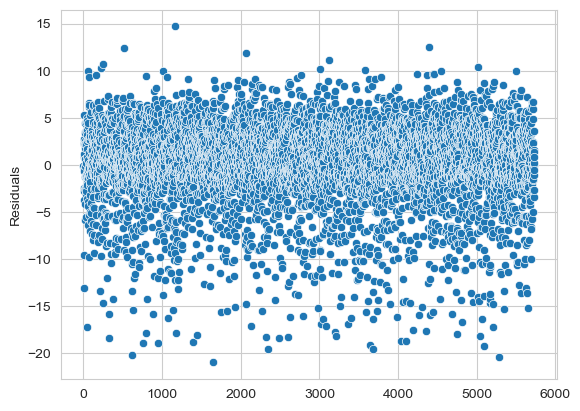

In [749]:
sns.scatterplot(df_pred["Residuals"]);

In [750]:
olsmod_10 = sm.OLS(y_train, X_train)
olsres_10 = olsmod_10.fit()
print(olsres_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1700.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:07:06   Log-Likelihood:                -16681.
No. Observations:                5734   AIC:                         3.339e+04
Df Residuals:                    5720   BIC:                         3.348e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1528 

In [751]:
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(olsres_10.params[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            olsres_10.params[i],
            "* (",
            X_train.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_10.params[i], "* (", X_train.columns[i], ")")

usr = 84.15276522828368 + -0.03736060125649175 * ( lread ) +  -0.0006704195774604786 * ( scall ) +  -0.005824145992866253 * ( swrite ) +  -0.3695913581646733 * ( exec ) +  -5.532940645573015e-06 * ( rchar ) +  -4.571998378510463e-06 * ( wchar ) +  -0.35715169306072025 * ( pgout ) +  0.6127268583732304 * ( atch ) +  -0.08723219808494767 * ( pgin ) +  -0.0404722425460035 * ( pflt ) +  -0.0004676826149801909 * ( freemem ) +  8.916432149272178e-06 * ( freeswap ) +  1.6329643613522553 * ( runqsz_Not_CPU_Bound )


In [752]:
X_train.columns

Index(['const', 'lread', 'scall', 'swrite', 'exec', 'rchar', 'wchar', 'pgout',
       'atch', 'pgin', 'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [753]:
X_test.columns

Index(['const', 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec',
       'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin',
       'ppgin', 'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [754]:
X_test1=X_test.drop(['ppgout','pgscan','vflt','ppgin','fork','sread','pgfree','lwrite'],axis=1)

In [755]:
y_pred_test = olsres_10.predict(X_test1)
y_pred_train = olsres_10.predict(X_train)

In [756]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [757]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse_test

4.679811126599779

In [758]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_train

4.4379716369218425

In [759]:
mae_test = mean_absolute_error(y_test, y_pred_test)
mae_test

3.3947405134040642

In [760]:
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_train

3.295893481432682

# Linear Regression using (sklearn)

In [761]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [762]:
print('The coefficient of determination R^2 of the prediction on Train set',regression_model.score(X_train, y_train))

The coefficient of determination R^2 of the prediction on Train set 0.7944040473034399


In [763]:
print('The coefficient of determination R^2 of the prediction on Test set',regression_model.score(X_test1, y_test))

The coefficient of determination R^2 of the prediction on Test set 0.7649762932292875


In [764]:
X_test1.columns

Index(['const', 'lread', 'scall', 'swrite', 'exec', 'rchar', 'wchar', 'pgout',
       'atch', 'pgin', 'pflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [765]:
print(regression_model.coef_)

[ 0.00000000e+00 -3.73606013e-02 -6.70419577e-04 -5.82414599e-03
 -3.69591358e-01 -5.53294065e-06 -4.57199838e-06 -3.57151693e-01
  6.12726858e-01 -8.72321981e-02 -4.04722425e-02 -4.67682615e-04
  8.91643215e-06  1.63296436e+00]


In [766]:
a=list(regression_model.coef_)

In [767]:
print(sorted(a))

[-0.36959135816484323, -0.3571516930610085, -0.087232198084962, -0.04047224254599485, -0.03736060125645611, -0.005824145992870113, -0.0006704195774614246, -0.00046768261498117967, -5.532940645574386e-06, -4.571998378478936e-06, 0.0, 8.916432149307096e-06, 0.612726858372207, 1.6329643613522846]


In [768]:
regression_model.intercept_

84.1527652282888

In [769]:
y_pred_test1 = regression_model.predict(X_test1)
y_pred_train1 = regression_model.predict(X_train)

### RMSE

In [770]:
from sklearn import metrics

In [771]:
RMSE=np.sqrt(metrics.mean_squared_error(y_train,y_pred_train1))
print('The Root Means Squared Error of the regression Model on the training data is',RMSE)

The Root Means Squared Error of the regression Model on the training data is 4.437971636921842


In [772]:
RMSE1=np.sqrt(metrics.mean_squared_error(y_test,y_pred_test1))
print('The Root Means Squared Error of the regression Model on the testing data is',RMSE1)

The Root Means Squared Error of the regression Model on the testing data is 4.679811126597905


In [773]:
MAE=metrics.mean_absolute_error(y_train,y_pred_train1)
print('The  Mean Absolute Error of the regression Model on the training data is',MAE)

The  Mean Absolute Error of the regression Model on the training data is 3.2958934814318095


In [774]:
MAE1=metrics.mean_absolute_error(y_test,y_pred_test1)
print('The  Mean Absolute Error of the regression Model on the testing data is',MAE1)

The  Mean Absolute Error of the regression Model on the testing data is 3.3947405134008917


# Problem 2

In [775]:
df_ctr=pd.read_excel('Contraceptive_method_dataset.xlsx')

In [776]:
df_ctr.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [777]:
df_ctr.shape

(1473, 10)

In [778]:
df_ctr.describe().T

count       mean       std   min   25%   50%   75%   max
Wife_age             1402.0  32.606277  8.274927  16.0  26.0  32.0  39.0  49.0
No_of_children_born  1452.0   3.254132  2.365212   0.0   1.0   3.0   4.0  16.0
Husband_Occupation   1473.0   2.137814  0.864857   1.0   1.0   2.0   3.0   4.0

In [779]:
df_ctr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [780]:
for i in df_ctr.columns:
    if df_ctr[i].dtype =='object':
        print(df_ctr[i].value_counts())
        print('\n')

Wife_ education
Tertiary      577
Secondary     410
Primary       334
Uneducated    152
Name: count, dtype: int64


Husband_education
Tertiary      899
Secondary     352
Primary       178
Uneducated     44
Name: count, dtype: int64


Wife_religion
Scientology        1253
Non-Scientology     220
Name: count, dtype: int64


Wife_Working
No     1104
Yes     369
Name: count, dtype: int64


Standard_of_living_index
Very High    684
High         431
Low          229
Very Low     129
Name: count, dtype: int64


Media_exposure 
Exposed        1364
Not-Exposed     109
Name: count, dtype: int64


Contraceptive_method_used
Yes    844
No     629
Name: count, dtype: int64




In [781]:
df_ctr.duplicated().sum()

80

In [782]:
df_ctr.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [783]:
col=['Wife_age','No_of_children_born']

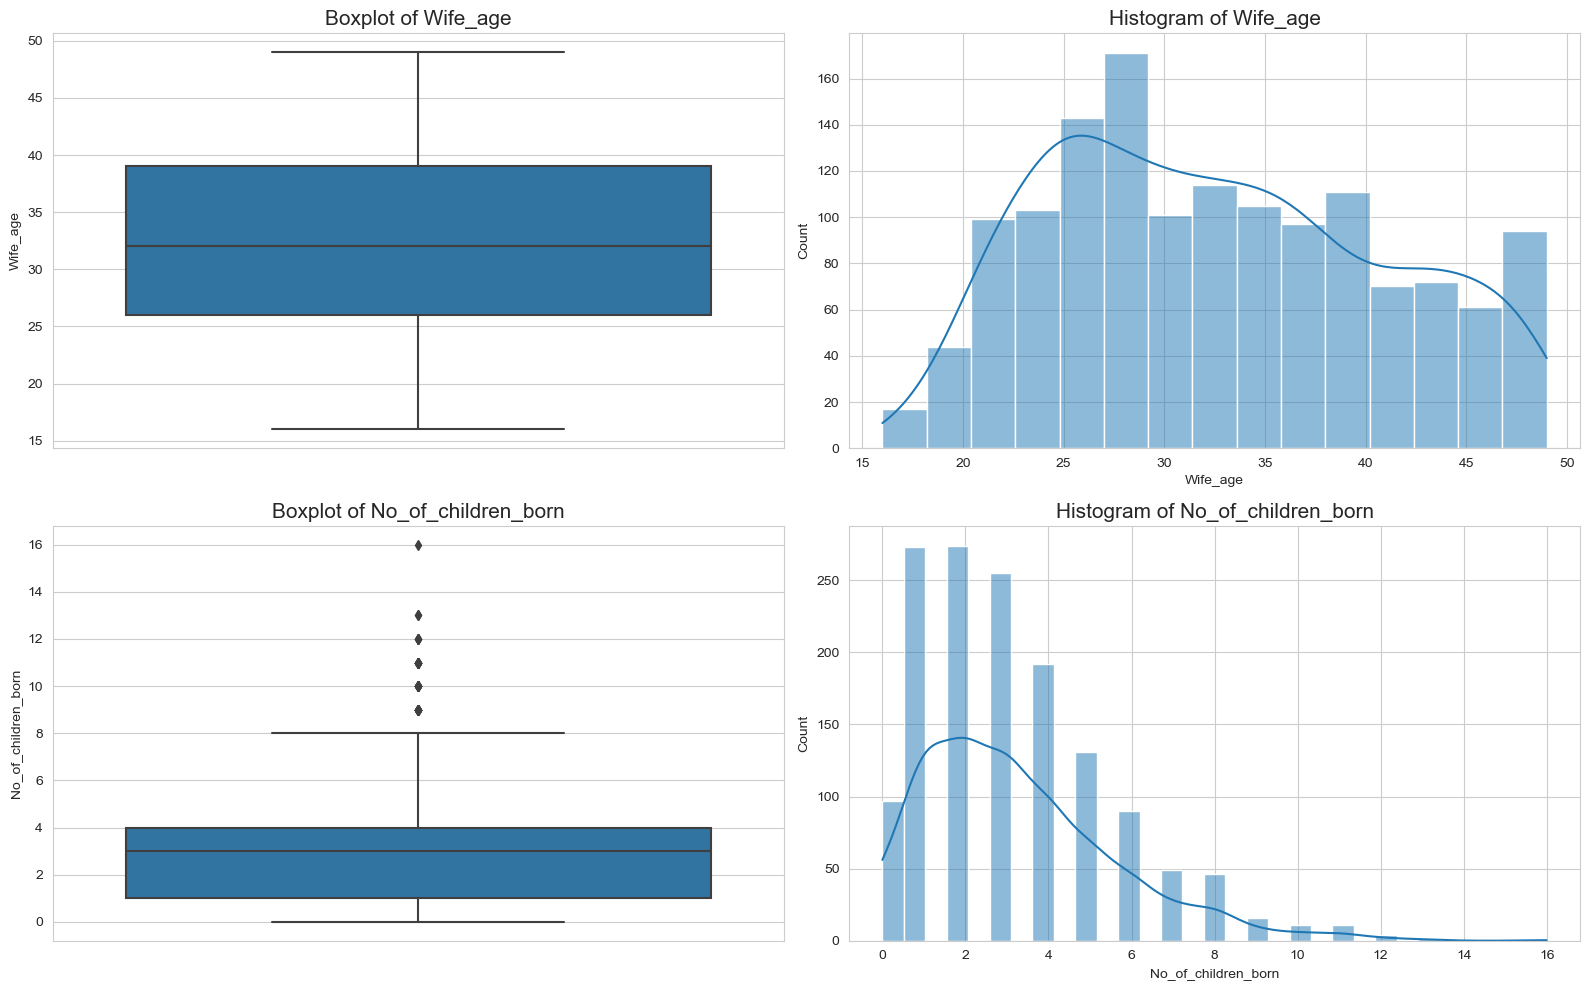

In [784]:
plt.figure(figsize = (16,10))
for i in range(len(col)):
    plt.subplot(2,2, i*2 + 1)
    sns.boxplot(y = df_ctr[col[i]], data = df_ctr)
    plt.title('Boxplot of {}'.format(col[i]),fontsize=15)
    plt.subplot(2, 2, i * 2 + 2)
    sns.histplot(x=df_ctr[col[i]], data=df_ctr,kde =True)
    plt.title('Histogram of {}'.format(col[i]), fontsize=15)
    plt.tight_layout()

In [785]:
a=df_ctr.select_dtypes('object')

In [786]:
cat=a.columns

In [787]:
len(cat)

7

In [788]:
sns.set_style("whitegrid")

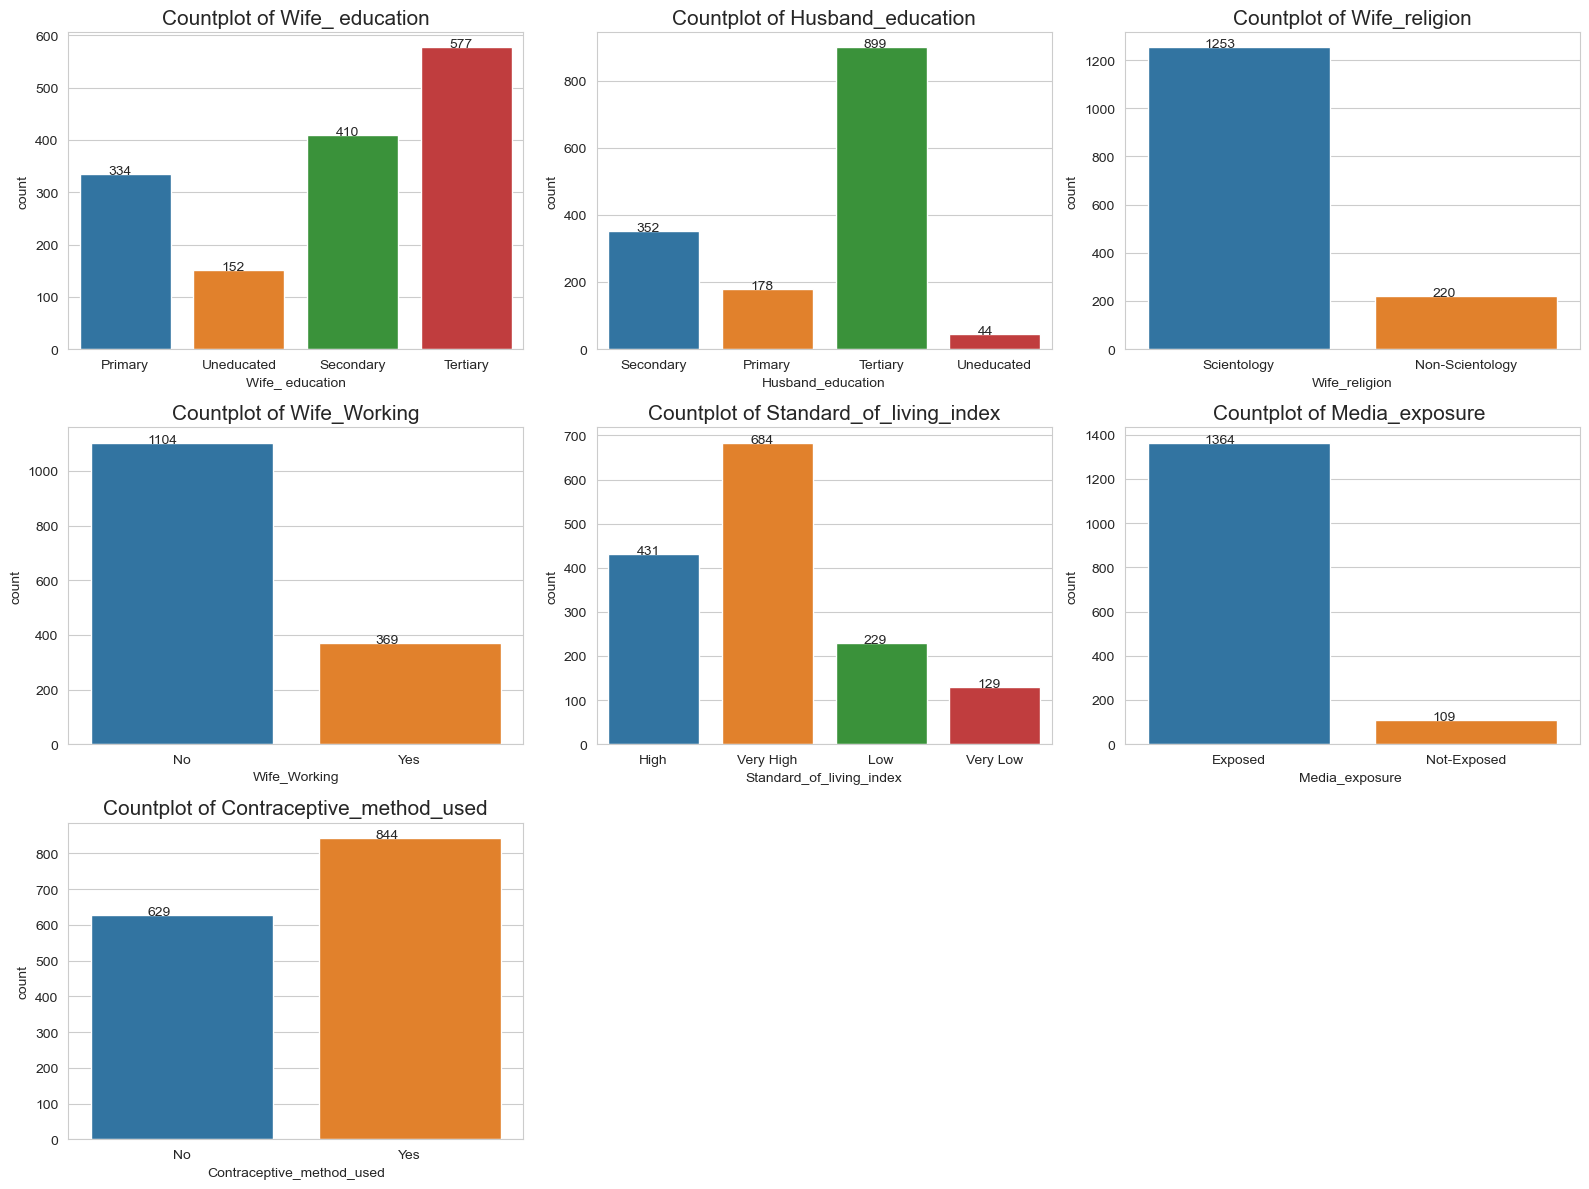

In [789]:
plt.figure(figsize = (16,12))
for i in range(len(cat)):
    plt.subplot(3,3, i + 1)
    ax=sns.countplot(x = df_ctr[cat[i]], data = df_ctr)
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.title('Countplot of {}'.format(cat[i]),fontsize=15)
    plt.tight_layout()

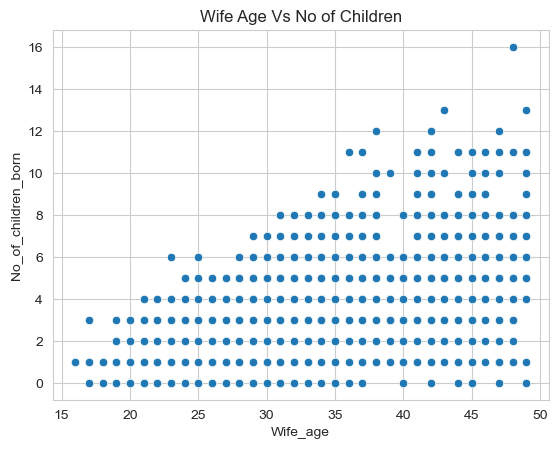

In [790]:
sns.scatterplot(data=df_ctr,x='Wife_age',y='No_of_children_born')
plt.title('Wife Age Vs No of Children');

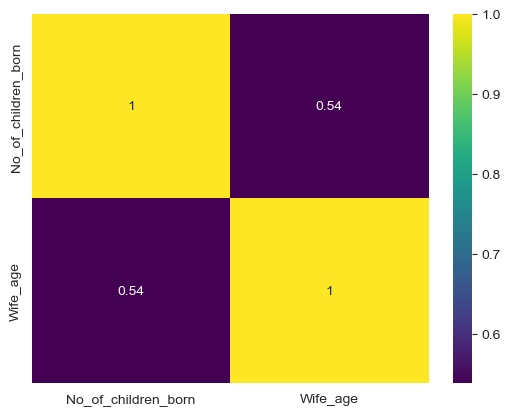

In [791]:
sns.heatmap(df_ctr[['No_of_children_born','Wife_age']].corr(),annot=True,cmap='viridis');

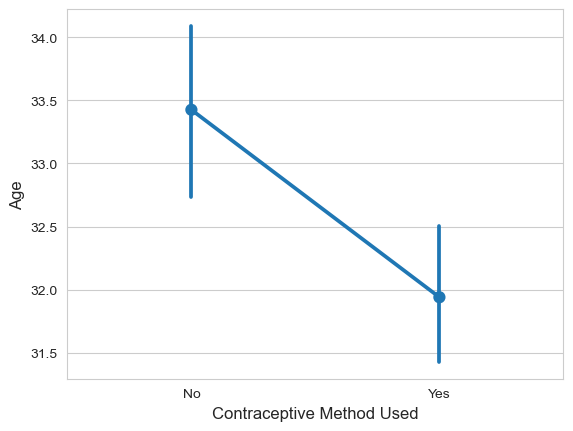

In [792]:
sns.pointplot(data=df_ctr,x='Contraceptive_method_used',y='Wife_age')
plt.ylabel('Age',fontsize=12)
plt.xlabel('Contraceptive Method Used',fontsize=12);

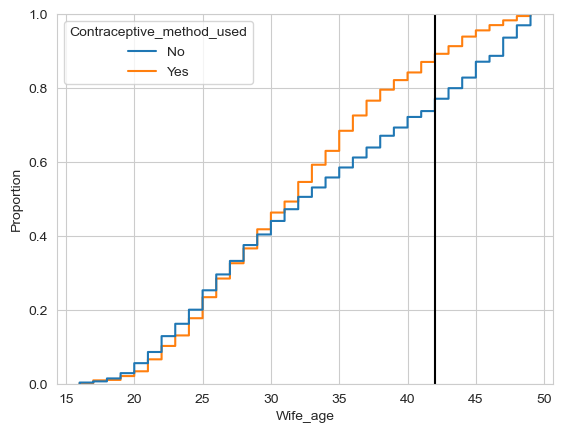

In [793]:
sns.ecdfplot(data=df_ctr,x='Wife_age',hue='Contraceptive_method_used')
plt.axvline(42,c='black');


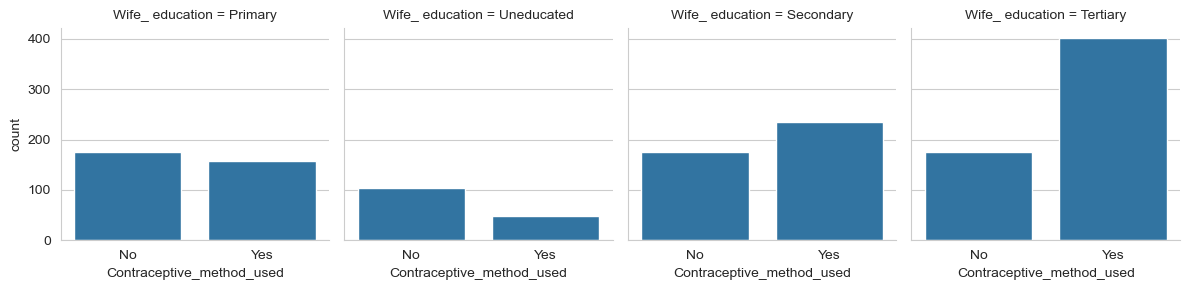

In [794]:
g=sns.FacetGrid(df_ctr,col='Wife_ education')
g.map(sns.countplot,'Contraceptive_method_used');

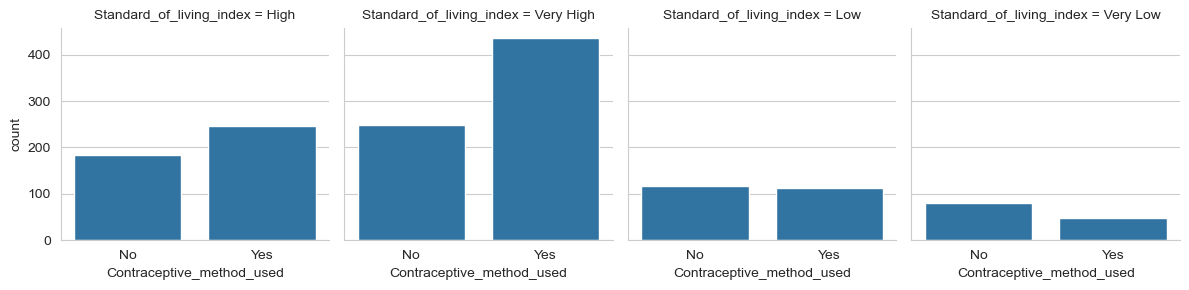

In [795]:
g=sns.FacetGrid(df_ctr,col='Standard_of_living_index')
g.map(sns.countplot,'Contraceptive_method_used');

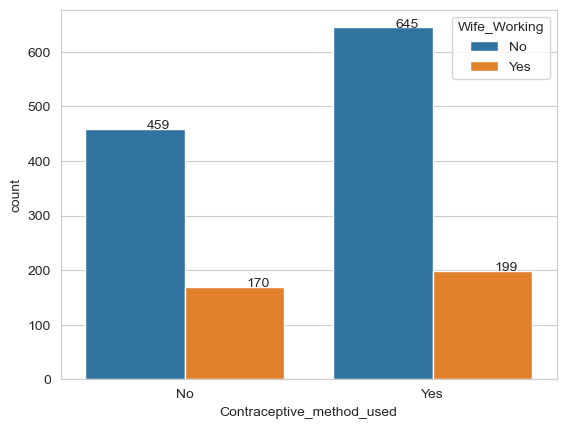

In [796]:
ax=sns.countplot(data=df_ctr,x='Contraceptive_method_used',hue='Wife_Working')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

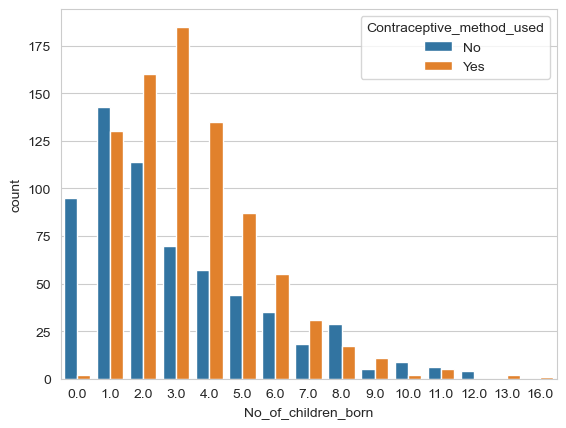

In [797]:
sns.countplot(data=df_ctr,x='No_of_children_born',hue='Contraceptive_method_used');

## Data Pre-processing

In [798]:
df_ctr.drop_duplicates(inplace=True)

In [799]:
df_ctr.duplicated().sum()

0

In [800]:
df_ctr.isnull().sum()

Wife_age                     67
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [801]:
for column in df_ctr.columns:
    if df_ctr[column].dtype != 'object':
        Median= df_ctr[column].median()
        df_ctr[column] = df_ctr[column].fillna(Median)

In [802]:
df_ctr.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [803]:
df_ctr['Wife_ education'].value_counts()

Wife_ education
Tertiary      515
Secondary     398
Primary       330
Uneducated    150
Name: count, dtype: int64

In [804]:
df_ctr['Wife_ education']=np.where(df_ctr['Wife_ education'] =='Uneducated', 1, df_ctr['Wife_ education'])
df_ctr['Wife_ education']=np.where(df_ctr['Wife_ education'] =='Primary', 2, df_ctr['Wife_ education'])
df_ctr['Wife_ education']=np.where(df_ctr['Wife_ education'] =='Secondary', 3, df_ctr['Wife_ education'])
df_ctr['Wife_ education']=np.where(df_ctr['Wife_ education'] =='Tertiary', 4, df_ctr['Wife_ education'])

In [805]:
df_ctr['Husband_education']=np.where(df_ctr['Husband_education'] =='Uneducated', 1, df_ctr['Husband_education'])
df_ctr['Husband_education']=np.where(df_ctr['Husband_education'] =='Primary', 2, df_ctr['Husband_education'])
df_ctr['Husband_education']=np.where(df_ctr['Husband_education'] =='Secondary', 3, df_ctr['Husband_education'])
df_ctr['Husband_education']=np.where(df_ctr['Husband_education'] =='Tertiary', 4, df_ctr['Husband_education'])

In [806]:
df_ctr['Wife_religion']=np.where(df_ctr['Wife_religion'] =='Scientology', 1, df_ctr['Wife_religion'])
df_ctr['Wife_religion']=np.where(df_ctr['Wife_religion'] =='Non-Scientology', 0, df_ctr['Wife_religion'])

In [807]:
df_ctr['Wife_Working']=np.where(df_ctr['Wife_Working'] =='Yes', 1, df_ctr['Wife_Working'])
df_ctr['Wife_Working']=np.where(df_ctr['Wife_Working'] =='No', 0, df_ctr['Wife_Working'])

In [808]:
df_ctr['Standard_of_living_index']=np.where(df_ctr['Standard_of_living_index'] =='Very Low', 1, df_ctr['Standard_of_living_index'])
df_ctr['Standard_of_living_index']=np.where(df_ctr['Standard_of_living_index'] =='Low', 2, df_ctr['Standard_of_living_index'])
df_ctr['Standard_of_living_index']=np.where(df_ctr['Standard_of_living_index'] =='High', 3, df_ctr['Standard_of_living_index'])
df_ctr['Standard_of_living_index']=np.where(df_ctr['Standard_of_living_index'] =='Very High', 4, df_ctr['Standard_of_living_index'])

In [809]:
df_ctr['Media_exposure ']=np.where(df_ctr['Media_exposure '] =='Exposed', 1, df_ctr['Media_exposure '])
df_ctr['Media_exposure ']=np.where(df_ctr['Media_exposure '] =='Not-Exposed', 0, df_ctr['Media_exposure '])

In [810]:
df_ctr['Contraceptive_method_used']=np.where(df_ctr['Contraceptive_method_used'] =='Yes', 1, df_ctr['Contraceptive_method_used'])
df_ctr['Contraceptive_method_used']=np.where(df_ctr['Contraceptive_method_used'] =='No', 0, df_ctr['Contraceptive_method_used'])

In [811]:
df_ctr.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0               2                 3                  3.0   
1      45.0               1                 3                 10.0   
2      43.0               2                 3                  7.0   
3      42.0               3                 2                  9.0   
4      36.0               3                 3                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0             1            0                   2                        3   
1             1            0                   3                        4   
2             1            0                   3                        4   
3             1            0                   3                        3   
4             1            0                   3                        2   

  Media_exposure  Contraceptive_method_used  
0               1                         0  
1               1                         0  
2               1                         0  
3               1                         0  
4               1                         0

In [812]:
df_ctr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   object 
 2   Husband_education          1393 non-null   object 
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_Working               1393 non-null   object 
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   object 
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 119.7+ KB


In [813]:
df_ctr[['Wife_ education','Husband_education','Wife_religion','Wife_Working','Standard_of_living_index','Media_exposure ','Contraceptive_method_used']]=df_ctr[['Wife_ education','Husband_education','Wife_religion','Wife_Working','Standard_of_living_index','Media_exposure ','Contraceptive_method_used']].astype('int64')

In [814]:
df_ctr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   int64  
 2   Husband_education          1393 non-null   int64  
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   int64  
 5   Wife_Working               1393 non-null   int64  
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   int64  
 8   Media_exposure             1393 non-null   int64  
 9   Contraceptive_method_used  1393 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 119.7 KB


## Train Test Split

In [815]:
X=df_ctr.drop('Contraceptive_method_used',axis=1)
y=df_ctr.pop('Contraceptive_method_used')

In [816]:
X.shape

(1393, 9)

In [817]:
y.shape

(1393,)

In [818]:
X_train_log, X_test__log, y_train__log, y_test__log = train_test_split(X, y, test_size=0.3, random_state=1)

In [819]:
X_train_log.shape

(975, 9)

In [820]:
X_test__log.shape

(418, 9)

# Logistic Regression model

In [821]:
from sklearn.linear_model import LogisticRegression

In [822]:
logmodel = LogisticRegression()
logmodel.fit(X_train_log, y_train__log)

LogisticRegression()

In [823]:
logpredict=logmodel.predict(X_train_log)

In [824]:
logpredict1=logmodel.predict(X_test__log)

## Confusion Matrix for the train data

In [825]:
print(metrics.confusion_matrix(y_train__log, logpredict))

[[226 196]
 [105 448]]


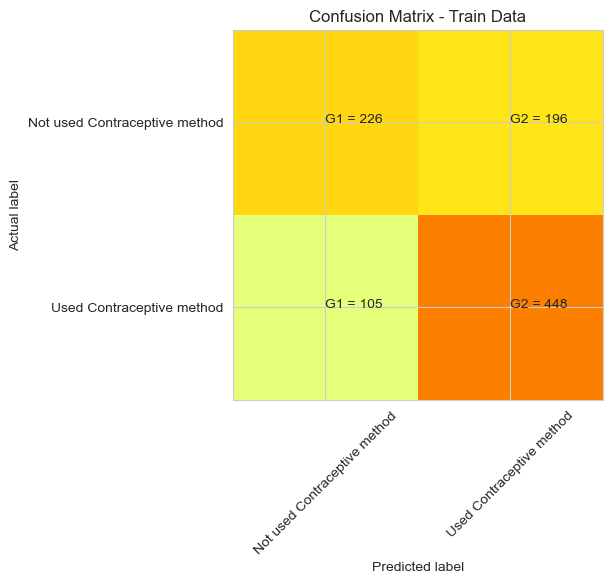

In [826]:
cm = metrics.confusion_matrix(y_train__log, logpredict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Not used Contraceptive method', 'Used Contraceptive method']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

## Confusuion Matrix for the test data

In [827]:
print(metrics.confusion_matrix(y_test__log, logpredict1))

[[ 87 105]
 [ 50 176]]


## Classification Report For Train Data

In [828]:
print('Classification Report','\n',metrics.classification_report(y_train__log, logpredict))

Classification Report 
               precision    recall  f1-score   support

           0       0.68      0.54      0.60       422
           1       0.70      0.81      0.75       553

    accuracy                           0.69       975
   macro avg       0.69      0.67      0.67       975
weighted avg       0.69      0.69      0.68       975



In [829]:
print('Classification Report','\n',metrics.classification_report(y_test__log, logpredict1))

Classification Report 
               precision    recall  f1-score   support

           0       0.64      0.45      0.53       192
           1       0.63      0.78      0.69       226

    accuracy                           0.63       418
   macro avg       0.63      0.62      0.61       418
weighted avg       0.63      0.63      0.62       418



In [830]:
sns.set_style('ticks')

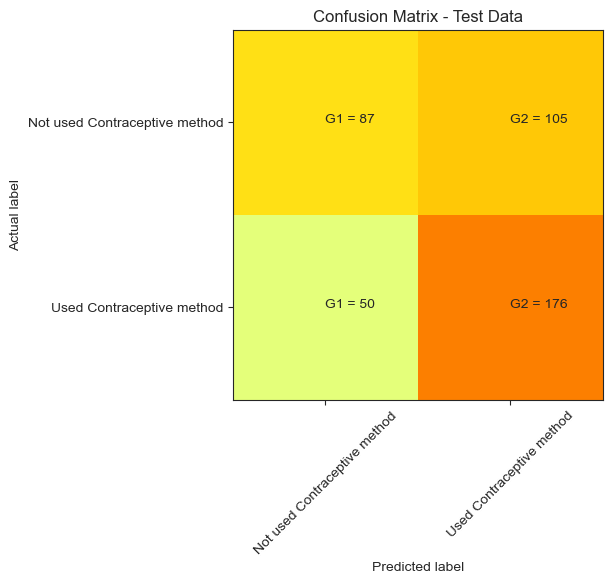

In [831]:
cm = metrics.confusion_matrix(y_test__log, logpredict1)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Not used Contraceptive method', 'Used Contraceptive method']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### AUC curve For Train data

AUC: 0.725


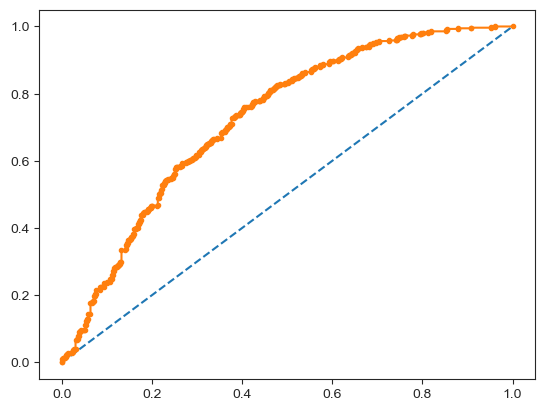

In [832]:
probs = logmodel.predict_proba(X_train_log)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train__log, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train__log, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.657


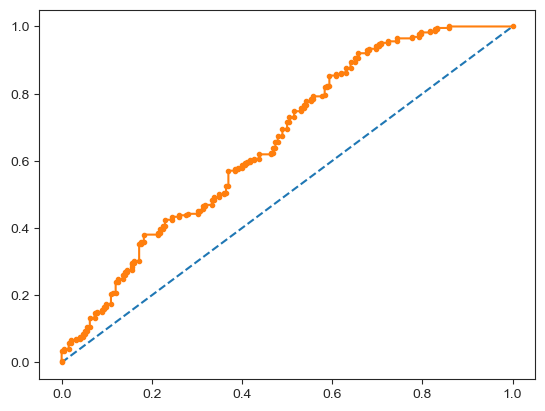

In [833]:
probs = logmodel.predict_proba(X_test__log)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test__log, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test__log, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [834]:
from sklearn.model_selection import GridSearchCV

In [835]:
grid={'penalty':['l2','none','l1'],
      'solver':['sag','lbfgs','newton-cg','liblinear'],
      'tol':[0.0001,0.00001],
     'max_iter':[100,1000,10000]}

In [836]:
reg_model_Log = LogisticRegression(random_state=1)

In [837]:
grid_search1 = GridSearchCV(estimator = reg_model_Log, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1',verbose=True)

In [838]:
grid_search1.fit(X_train_log, y_train__log)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'max_iter': [100, 1000, 10000],
                         'penalty': ['l2', 'none', 'l1'],
                         'solver': ['sag', 'lbfgs', 'newton-cg', 'liblinear'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1', verbose=True)

In [839]:
print(grid_search1.best_params_,'\n')
print(grid_search1.best_estimator_)

{'max_iter': 100, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(random_state=1, solver='sag')


In [840]:
best_Log_model=LogisticRegression(max_iter=100,penalty='l2',solver='sag',tol=0.0001,random_state=1)

In [841]:
best_Log_model.fit(X_train_log,y_train__log)

LogisticRegression(random_state=1, solver='sag')

In [842]:
best_Log_model_predict=best_Log_model.predict(X_test__log)

In [843]:
print('Classification Report','\n',metrics.classification_report(y_test__log, best_Log_model_predict))

Classification Report 
               precision    recall  f1-score   support

           0       0.64      0.45      0.53       192
           1       0.63      0.79      0.70       226

    accuracy                           0.63       418
   macro avg       0.63      0.62      0.61       418
weighted avg       0.63      0.63      0.62       418



AUC: 0.654


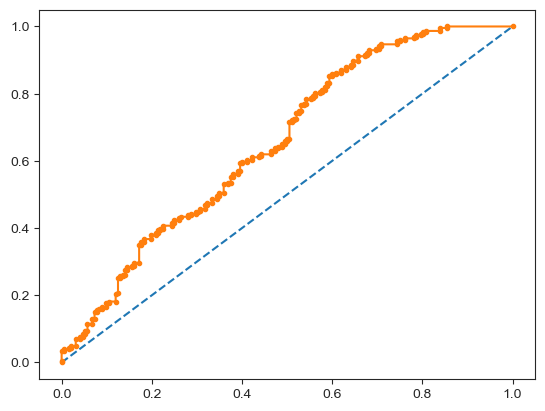

In [844]:
probs = best_Log_model.predict_proba(X_test__log)
probs = probs[:, 1]
auc = roc_auc_score(y_test__log, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test__log, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

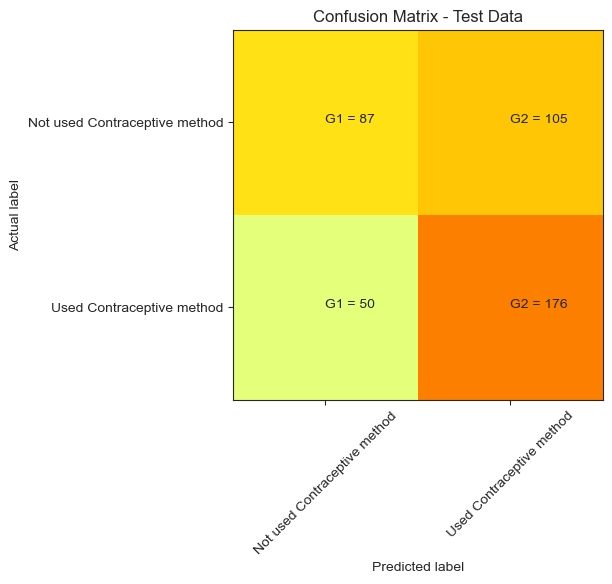

In [845]:
cm1 = metrics.confusion_matrix(y_test__log, best_Log_model_predict)
plt.clf()
plt.imshow(cm1, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Not used Contraceptive method', 'Used Contraceptive method']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# LDA

In [846]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [847]:
y_train__log.value_counts(normalize=True)

Contraceptive_method_used
1    0.567179
0    0.432821
Name: proportion, dtype: float64

In [848]:
clf=LinearDiscriminantAnalysis()
model_LDA=clf.fit(X_train_log,y_train__log)

In [849]:
predict_LDA=model_LDA.predict(X_train_log)

In [850]:
predict_LDA1=model_LDA.predict(X_test__log)

### Confusion Matrix For Train Data

In [851]:
print(metrics.confusion_matrix(y_train__log, predict_LDA))

[[217 205]
 [ 95 458]]


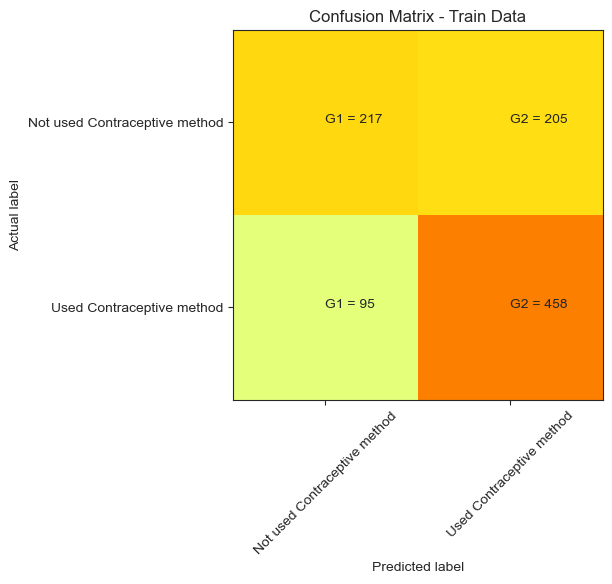

In [852]:
cm = metrics.confusion_matrix(y_train__log, predict_LDA)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Not used Contraceptive method', 'Used Contraceptive method']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### Confusion Matrix For Test Data

In [853]:
print(metrics.confusion_matrix(y_test__log, predict_LDA1))

[[ 82 110]
 [ 48 178]]


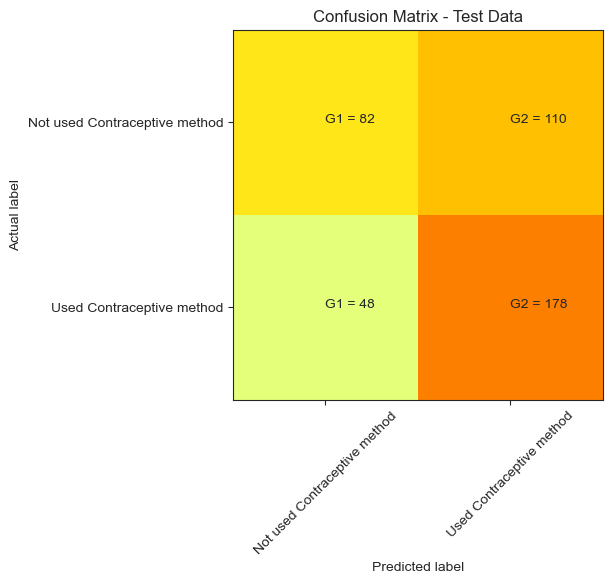

In [854]:
cm = metrics.confusion_matrix(y_test__log, predict_LDA1)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Not used Contraceptive method', 'Used Contraceptive method']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

AUC: 0.724


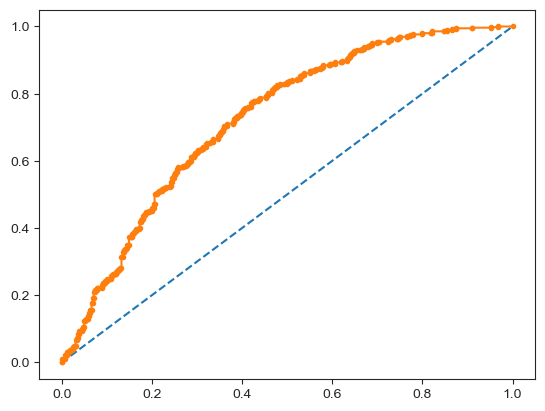

In [855]:
probs = model_LDA.predict_proba(X_train_log)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train__log, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train__log, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.656


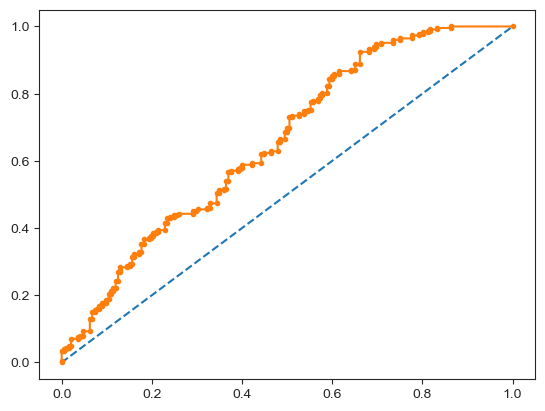

In [856]:
probs = model_LDA.predict_proba(X_test__log)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test__log, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test__log, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [857]:
print('Classification Report','\n',metrics.classification_report(y_train__log, predict_LDA))

Classification Report 
               precision    recall  f1-score   support

           0       0.70      0.51      0.59       422
           1       0.69      0.83      0.75       553

    accuracy                           0.69       975
   macro avg       0.69      0.67      0.67       975
weighted avg       0.69      0.69      0.68       975



In [858]:
print('Classification Report','\n',metrics.classification_report(y_test__log, predict_LDA1))

Classification Report 
               precision    recall  f1-score   support

           0       0.63      0.43      0.51       192
           1       0.62      0.79      0.69       226

    accuracy                           0.62       418
   macro avg       0.62      0.61      0.60       418
weighted avg       0.62      0.62      0.61       418



In [859]:
model_LDA.intercept_

array([-0.90675224])

In [860]:
coefficients=model_LDA.coef_

In [861]:
print("Coefficients:", coefficients)

Coefficients: [[-0.08383057  0.48973534  0.07542596  0.35443563 -0.42671887 -0.02218792
   0.17313293  0.29931418  0.1827471 ]]


### The LDF for the model is

In [862]:
print('LDF=-0.906+ X1*(-0.083) + X2*(0.489) + X3*(0.075) + X4*(0.354) + X5*(-0.426) + X6*(-0.022) + X7*(0.173) + X8*(0.299) + X9*(0.182)')


LDF=-0.906+ X1*(-0.083) + X2*(0.489) + X3*(0.075) + X4*(0.354) + X5*(-0.426) + X6*(-0.022) + X7*(0.173) + X8*(0.299) + X9*(0.182)


# CART

In [863]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [864]:
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [865]:
dt_model.fit(X_train_log,y_train__log)

DecisionTreeClassifier(random_state=1)

In [866]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train_log), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [867]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train_log.columns).sort_values('Imp',ascending=False))


                               Imp
Wife_age                  0.292197
No_of_children_born       0.240709
Wife_ education           0.106970
Husband_Occupation        0.106614
Standard_of_living_index  0.103483
Husband_education         0.051409
Wife_Working              0.048122
Wife_religion             0.033211
Media_exposure            0.017285


In [868]:
dt_predict=dt_model.predict(X_test__log)

In [869]:
dt_predict1=dt_model.predict(X_train_log)

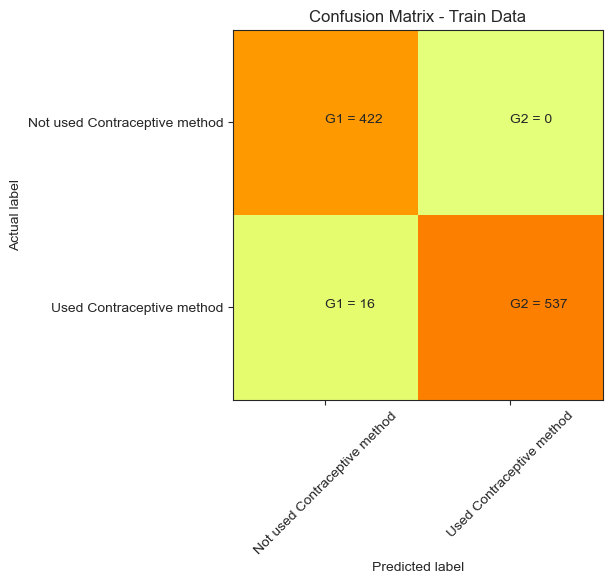

array([[422,   0],
       [ 16, 537]], dtype=int64)

In [870]:

cm = metrics.confusion_matrix(y_train__log, dt_predict1)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Not used Contraceptive method', 'Used Contraceptive method']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()
cm

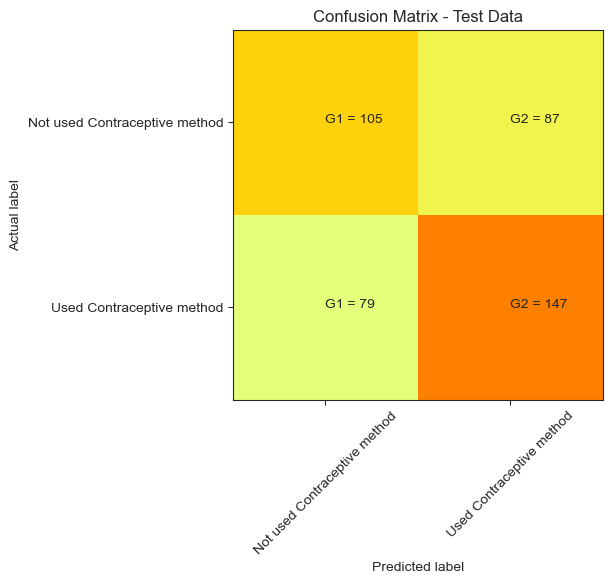

In [871]:
cm = metrics.confusion_matrix(y_test__log, dt_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Not used Contraceptive method', 'Used Contraceptive method']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [872]:
from sklearn.metrics import classification_report,confusion_matrix

In [873]:
print(classification_report(y_train__log,dt_predict1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       422
           1       1.00      0.97      0.99       553

    accuracy                           0.98       975
   macro avg       0.98      0.99      0.98       975
weighted avg       0.98      0.98      0.98       975



In [874]:
print(classification_report(y_test__log,dt_predict))

              precision    recall  f1-score   support

           0       0.57      0.55      0.56       192
           1       0.63      0.65      0.64       226

    accuracy                           0.60       418
   macro avg       0.60      0.60      0.60       418
weighted avg       0.60      0.60      0.60       418



In [875]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [1,5,10,15,20],
              'min_samples_leaf':[1,5,10,15,20],
              'criterion' :['gini', 'entropy'],
              'min_samples_split':[5,10,15,20,25,30]
             }
tree_clas = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train_log,y_train__log)

Fitting 5 folds for each of 2700 candidates, totalling 13500 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 15, 20],
                         'min_samples_split': [5, 10, 15, 20, 25, 30]},
             verbose=True)

In [876]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10, max_features='sqrt',
                       min_samples_leaf=15, min_samples_split=5,
                       random_state=1)

In [877]:
reg_dt_model = DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10, max_features='sqrt',
                       min_samples_leaf=15, min_samples_split=5,
                       random_state=1)


In [878]:
reg_dt_model.fit(X_train_log,y_train__log)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10, max_features='sqrt',
                       min_samples_leaf=15, min_samples_split=5,
                       random_state=1)

In [879]:
train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train_log), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [880]:
dt_reg_predict=reg_dt_model.predict(X_test__log)

In [881]:
dt_reg_predict1=reg_dt_model.predict(X_train_log)

In [882]:
print(classification_report(y_train__log,dt_reg_predict1))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68       422
           1       0.74      0.84      0.79       553

    accuracy                           0.74       975
   macro avg       0.75      0.73      0.73       975
weighted avg       0.75      0.74      0.74       975



In [883]:
print(classification_report(y_test__log,dt_reg_predict))

              precision    recall  f1-score   support

           0       0.69      0.54      0.60       192
           1       0.67      0.79      0.72       226

    accuracy                           0.67       418
   macro avg       0.68      0.66      0.66       418
weighted avg       0.68      0.67      0.67       418



In [884]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train_log.columns).sort_values('Imp',ascending=False))


                               Imp
No_of_children_born       0.459324
Wife_age                  0.317840
Wife_ education           0.155576
Husband_education         0.027978
Standard_of_living_index  0.017100
Wife_Working              0.011926
Husband_Occupation        0.010256
Wife_religion             0.000000
Media_exposure            0.000000


## AUC Score For Unregularized Model

AUC: 0.999


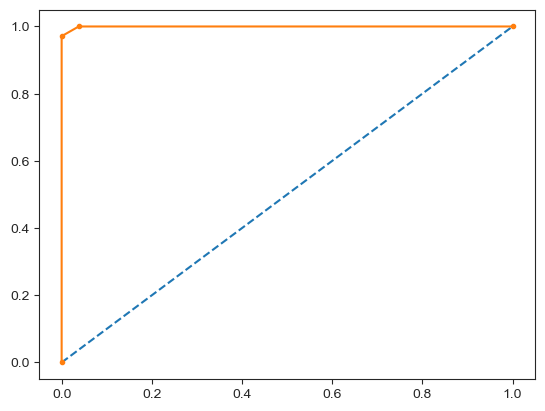

In [885]:
probs = dt_model.predict_proba(X_train_log)
probs = probs[:, 1]
auc = roc_auc_score(y_train__log, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train__log, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.603


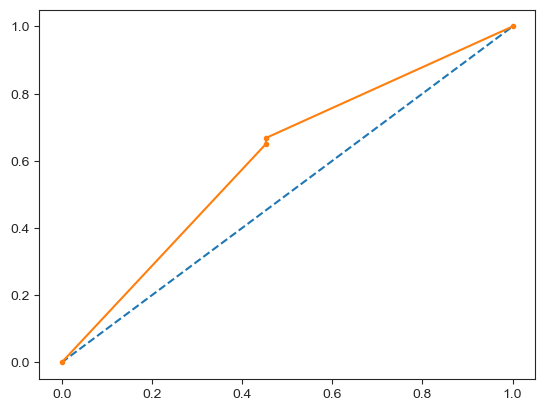

In [886]:
probs = dt_model.predict_proba(X_test__log)
probs = probs[:, 1]
auc = roc_auc_score(y_test__log, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test__log, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.744


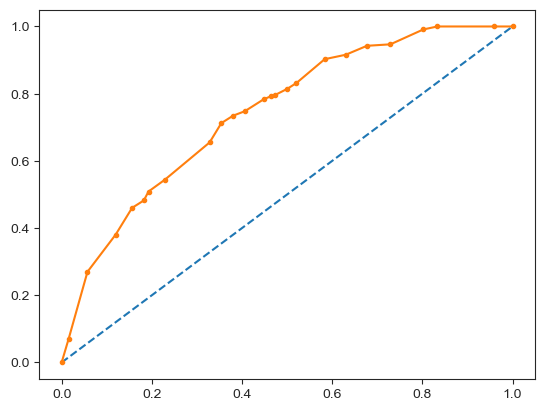

In [887]:
probs = reg_dt_model.predict_proba(X_test__log)
probs = probs[:, 1]
auc = roc_auc_score(y_test__log, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test__log, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

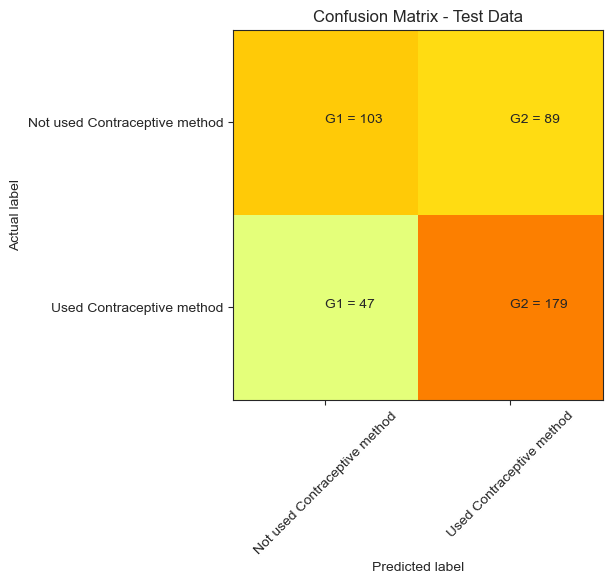

In [888]:
cm = metrics.confusion_matrix(y_test__log, dt_reg_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Not used Contraceptive method', 'Used Contraceptive method']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()